# **Project Title :** **Fake News Detection**


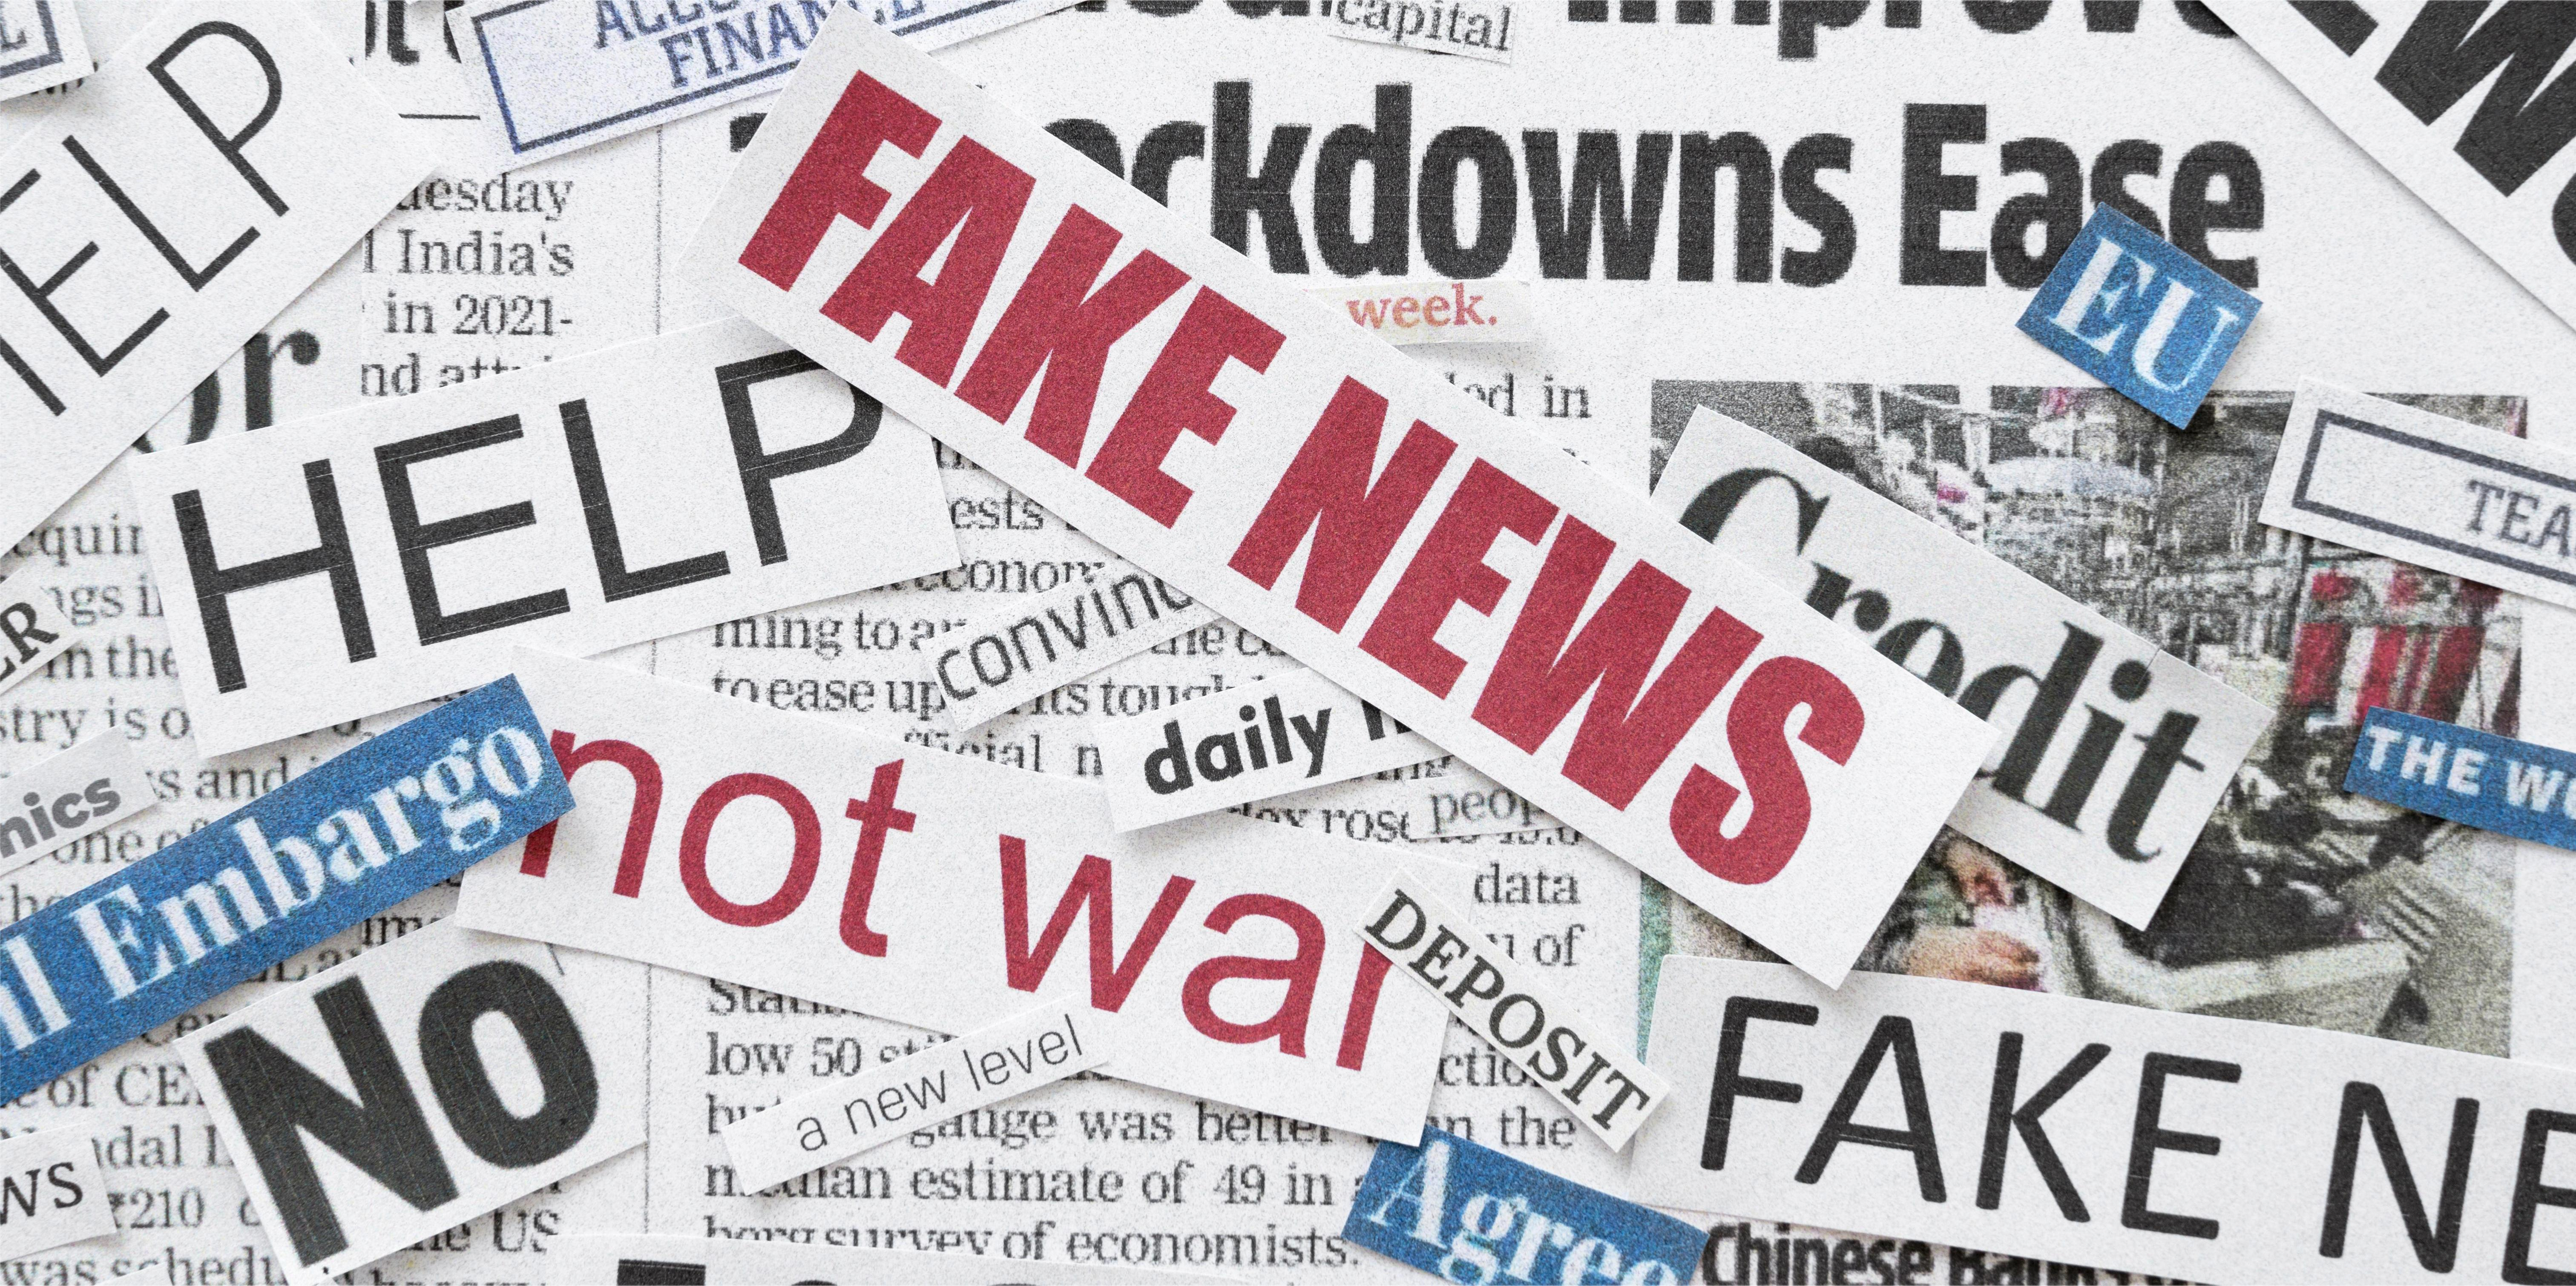

# **Introduction:**

This dataset contains 4,000 rows and 24 columns with detailed metadata about news articles, including title, author, state of origin, sentiment score, source credibility, and more. It is designed for machine learning models to classify news as Real or Fake based on various linguistic, statistical, and factual parameters.

# **Objective:**

Building an ML model to forecast news stories using the dataset's content and category is the aim.Through the analysis of feature engineering, model training, model evaluation, data cleaning, and preprocessing.It is capable of correctly identifying news items as either real or fake.  

# **Features:**

**id :**	   Unique identifier for each article/post

**title:**	Title or headline of the content

**author:**	Author of the content

**text:**	Full text or body of the article/post

**state:**	U.S. state or location related to the article/post

**date_published:**	Date the article/post was published

**source:**	The outlet or platform that published the content

**category:**	Topic or category (e.g., politics, sports, health)

**sentiment_score:**	Numeric score representing sentiment (e.g.,
                      -1 to 1 or 0 to 1)

**word_count:**	Number of words in the content

**char_count:**	Number of characters in the content

**has_images:**	Boolean (true/false or 0/1) if images are included

**has_videos:**	Boolean (true/false or 0/1) if videos are included

**readability_score:**	Metric like Flesch–Kincaid readability score

**num_shares:**	How many times the content was shared

**num_comments:**	Number of comments received

**political_bias:**	Bias score or label (e.g., left, center, right)

**fact_check_rating:**	Accuracy or truthfulness rating from fact-checkers

**is_satirical:**	Boolean indicating if the content is satire

**trust_score	Score:** representing the trustworthiness of the article

**source_reputation:**	Reputation score of the source outlet

**clickbait_score:** Score indicating likelihood of being clickbait

**plagiarism_score:**	Score indicating possible plagiarism

**label:**	Final classification (e.g., real/fake, true/false)


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read the dataset
df=pd.read_csv("fake_news_detection.csv")
df

id               title        author  \
0        1     Breaking News 1    Jane Smith   
1        2     Breaking News 2   Emily Davis   
2        3     Breaking News 3      John Doe   
3        4     Breaking News 4  Alex Johnson   
4        5     Breaking News 5   Emily Davis   
...    ...                 ...           ...   
3995  3996  Breaking News 3996      John Doe   
3996  3997  Breaking News 3997  Alex Johnson   
3997  3998  Breaking News 3998  Alex Johnson   
3998  3999  Breaking News 3999      John Doe   
3999  4000  Breaking News 4000      John Doe   

                                                   text           state  \
0     This is the content of article 1. It contains ...       Tennessee   
1     This is the content of article 2. It contains ...       Wisconsin   
2     This is the content of article 3. It contains ...        Missouri   
3     This is the content of article 4. It contains ...  North Carolina   
4     This is the content of article 5. It contains ...      California   
...                                                 ...             ...   
3995  This is the content of article 3996. It contai...            Ohio   
3996  This is the content of article 3997. It contai...      Washington   
3997  This is the content of article 3998. It contai...      California   
3998  This is the content of article 3999. It contai...        Illinois   
3999  This is the content of article 4000. It contai...           Texas   

     date_published          source       category  sentiment_score  \
0        30-11-2021       The Onion  Entertainment            -0.22   
1        02-09-2021    The Guardian     Technology             0.92   
2        13-04-2021  New York Times         Sports             0.25   
3        08-03-2020             CNN         Sports             0.94   
4        23-03-2022      Daily Mail     Technology            -0.01   
...             ...             ...            ...              ...   
3995     25-04-2020        InfoWars     Technology             0.91   
3996     09-01-2022             CNN         Sports            -0.57   
3997     03-03-2023       Breitbart  Entertainment            -0.17   
3998     13-04-2021  New York Times         Health            -0.88   
3999     20-12-2023    The Guardian         Health            -0.95   

      word_count  ...  num_shares  num_comments  political_bias  \
0           1302  ...       47305           450          Center   
1            322  ...       39804           530            Left   
2            228  ...       45860           763          Center   
3            155  ...       34222           945          Center   
4            962  ...       35934           433           Right   
...          ...  ...         ...           ...             ...   
3995        1227  ...       38880           697           Right   
3996        1296  ...        3650           925            Left   
3997         522  ...       35391           577            Left   
3998         169  ...       40424           201            Left   
3999         465  ...       48913           279           Right   

      fact_check_rating  is_satirical  trust_score source_reputation  \
0                 FALSE             1           76                 6   
1                 Mixed             1            1                 5   
2                 Mixed             0           57                 1   
3                  TRUE             1           18                10   
4                 Mixed             0           95                 6   
...                 ...           ...          ...               ...   
3995              Mixed             0           29                10   
3996              FALSE             1           53                 3   
3997              FALSE             0           22                 9   
3998              FALSE             1            3                 6   
3999               TRUE             1           73                 4   

     cl

# **Inital EDA :**

In [ ]:
# find first 5 rows
df.head()

id            title        author  \
0   1  Breaking News 1    Jane Smith   
1   2  Breaking News 2   Emily Davis   
2   3  Breaking News 3      John Doe   
3   4  Breaking News 4  Alex Johnson   
4   5  Breaking News 5   Emily Davis   

                                                text           state  \
0  This is the content of article 1. It contains ...       Tennessee   
1  This is the content of article 2. It contains ...       Wisconsin   
2  This is the content of article 3. It contains ...        Missouri   
3  This is the content of article 4. It contains ...  North Carolina   
4  This is the content of article 5. It contains ...      California   

  date_published          source       category  sentiment_score  word_count  \
0     30-11-2021       The Onion  Entertainment            -0.22        1302   
1     02-09-2021    The Guardian     Technology             0.92         322   
2     13-04-2021  New York Times         Sports             0.25         228   
3     08-03-2020             CNN         Sports             0.94         155   
4     23-03-2022      Daily Mail     Technology            -0.01         962   

   ...  num_shares  num_comments  political_bias  fact_check_rating  \
0  ...       47305           450          Center              FALSE   
1  ...       39804           530            Left              Mixed   
2  ...       45860           763          Center              Mixed   
3  ...       34222           945          Center               TRUE   
4  ...       35934           433           Right              Mixed   

   is_satirical  trust_score source_reputation clickbait_score  \
0             1           76                 6            0.84   
1             1            1                 5            0.85   
2             0           57                 1            0.72   
3             1           18                10            0.92   
4             0           95                 6            0.66   

   plagiarism_score  label  
0             53.35   Fake  
1             28.28   Fake  
2              0.38   Fake  
3             32.20   Fake  
4             77.70   Real  

[5 rows x 24 columns]

In [ ]:
# find last 5 rows
df.tail()

id               title        author  \
3995  3996  Breaking News 3996      John Doe   
3996  3997  Breaking News 3997  Alex Johnson   
3997  3998  Breaking News 3998  Alex Johnson   
3998  3999  Breaking News 3999      John Doe   
3999  4000  Breaking News 4000      John Doe   

                                                   text       state  \
3995  This is the content of article 3996. It contai...        Ohio   
3996  This is the content of article 3997. It contai...  Washington   
3997  This is the content of article 3998. It contai...  California   
3998  This is the content of article 3999. It contai...    Illinois   
3999  This is the content of article 4000. It contai...       Texas   

     date_published          source       category  sentiment_score  \
3995     25-04-2020        InfoWars     Technology             0.91   
3996     09-01-2022             CNN         Sports            -0.57   
3997     03-03-2023       Breitbart  Entertainment            -0.17   
3998     13-04-2021  New York Times         Health            -0.88   
3999     20-12-2023    The Guardian         Health            -0.95   

      word_count  ...  num_shares  num_comments  political_bias  \
3995        1227  ...       38880           697           Right   
3996        1296  ...        3650           925            Left   
3997         522  ...       35391           577            Left   
3998         169  ...       40424           201            Left   
3999         465  ...       48913           279           Right   

      fact_check_rating  is_satirical  trust_score source_reputation  \
3995              Mixed             0           29                10   
3996              FALSE             1           53                 3   
3997              FALSE             0           22                 9   
3998              FALSE             1            3                 6   
3999               TRUE             1           73                 4   

     clickbait_score  plagiarism_score  label  
3995            0.22             95.46   Fake  
3996            0.42             16.54   Fake  
3997            0.50             28.51   Fake  
3998            0.17             71.16   Real  
3999            0.09             27.65   Real  

[5 rows x 24 columns]

In [ ]:
# find the shape of the dataset
df.shape

(4000, 24)

In [ ]:
# find all detail of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   object 
 2   author             4000 non-null   object 
 3   text               4000 non-null   object 
 4   state              4000 non-null   object 
 5   date_published     4000 non-null   object 
 6   source             4000 non-null   object 
 7   category           4000 non-null   object 
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

In [ ]:
# find null values
df.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

In [ ]:
# find unique values
df.nunique()

id                   4000
title                4000
author                  5
text                 4000
state                  20
date_published       1416
source                 13
category                6
sentiment_score       201
word_count           1324
char_count           3129
has_images              2
has_videos              2
readability_score    2734
num_shares           3849
num_comments          982
political_bias          3
fact_check_rating       3
is_satirical            2
trust_score           101
source_reputation      10
clickbait_score       101
plagiarism_score     3320
label                   2
dtype: int64

In [ ]:
#find categorical features

categorical_features=df.select_dtypes(include=['object']).columns
categorical_features

Index(['title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'political_bias', 'fact_check_rating', 'label'],
      dtype='object')

In [ ]:
#find numerical features

numerical_features=df.select_dtypes(include=np.number).columns
numerical_features

Index(['id', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'is_satirical', 'trust_score', 'source_reputation', 'clickbait_score',
       'plagiarism_score'],
      dtype='object')

In [ ]:
# find descriptive statistics for numerical features
df.describe()

id  sentiment_score   word_count  char_count  has_images  \
count  4000.000000      4000.000000  4000.000000   4000.0000  4000.00000   
mean   2000.500000        -0.000645   795.655750   4277.0680     0.49650   
std    1154.844867         0.574768   406.373871   2186.2073     0.50005   
min       1.000000        -1.000000   100.000000    500.0000     0.00000   
25%    1000.750000        -0.490000   445.750000   2358.7500     0.00000   
50%    2000.500000        -0.010000   793.000000   4287.0000     0.00000   
75%    3000.250000         0.510000  1150.000000   6206.5000     1.00000   
max    4000.000000         1.000000  1500.000000   7996.0000     1.00000   

        has_videos  readability_score    num_shares  num_comments  \
count  4000.000000        4000.000000   4000.000000   4000.000000   
mean      0.484500          54.764595  25144.596750    489.870250   
std       0.499822          14.404027  14387.537467    287.435733   
min       0.000000          30.020000     39.000000      0.000000   
25%       0.000000          42.480000  12781.750000    238.000000   
50%       0.000000          54.235000  25308.500000    483.000000   
75%       1.000000          67.215000  37453.500000    741.000000   
max       1.000000          79.980000  50000.000000   1000.000000   

       is_satirical  trust_score  source_reputation  clickbait_score  \
count   4000.000000  4000.000000         4000.00000      4000.000000   
mean       0.497000    49.960750            5.54925         0.494447   
std        0.500054    29.467911            2.87422         0.289138   
min        0.000000     0.000000            1.00000         0.000000   
25%        0.000000    24.000000            3.00000         0.240000   
50%        0.000000    50.000000            6.00000         0.490000   
75%        1.000000    76.000000            8.00000         0.740000   
max        1.000000   100.000000           10.00000         1.000000   

       plagiarism_score  
count       4000.000000  
mean          50.598110  
std           28.932298  
min            0.040000  
25%           25.915000  
50%           51.480000  
75%           75.580000  
max           99.950000

In [ ]:
# find duplicate
df.duplicated().sum()

np.int64(0)

# **Observation :**


*   There is no duplicate and missing values in this dataset.
*   We take label column for the target variable.

*   Showing some Univariate,Bivariate and Multivariate visualization to understand and further model building to predict the news articles.






# **Data Visulization (EDA):**

In [ ]:
# Analyse distribution for some categorical columns

categorical_columns = ['state','author','category','source','label']
categorical_columns

['state', 'author', 'category', 'source', 'label']

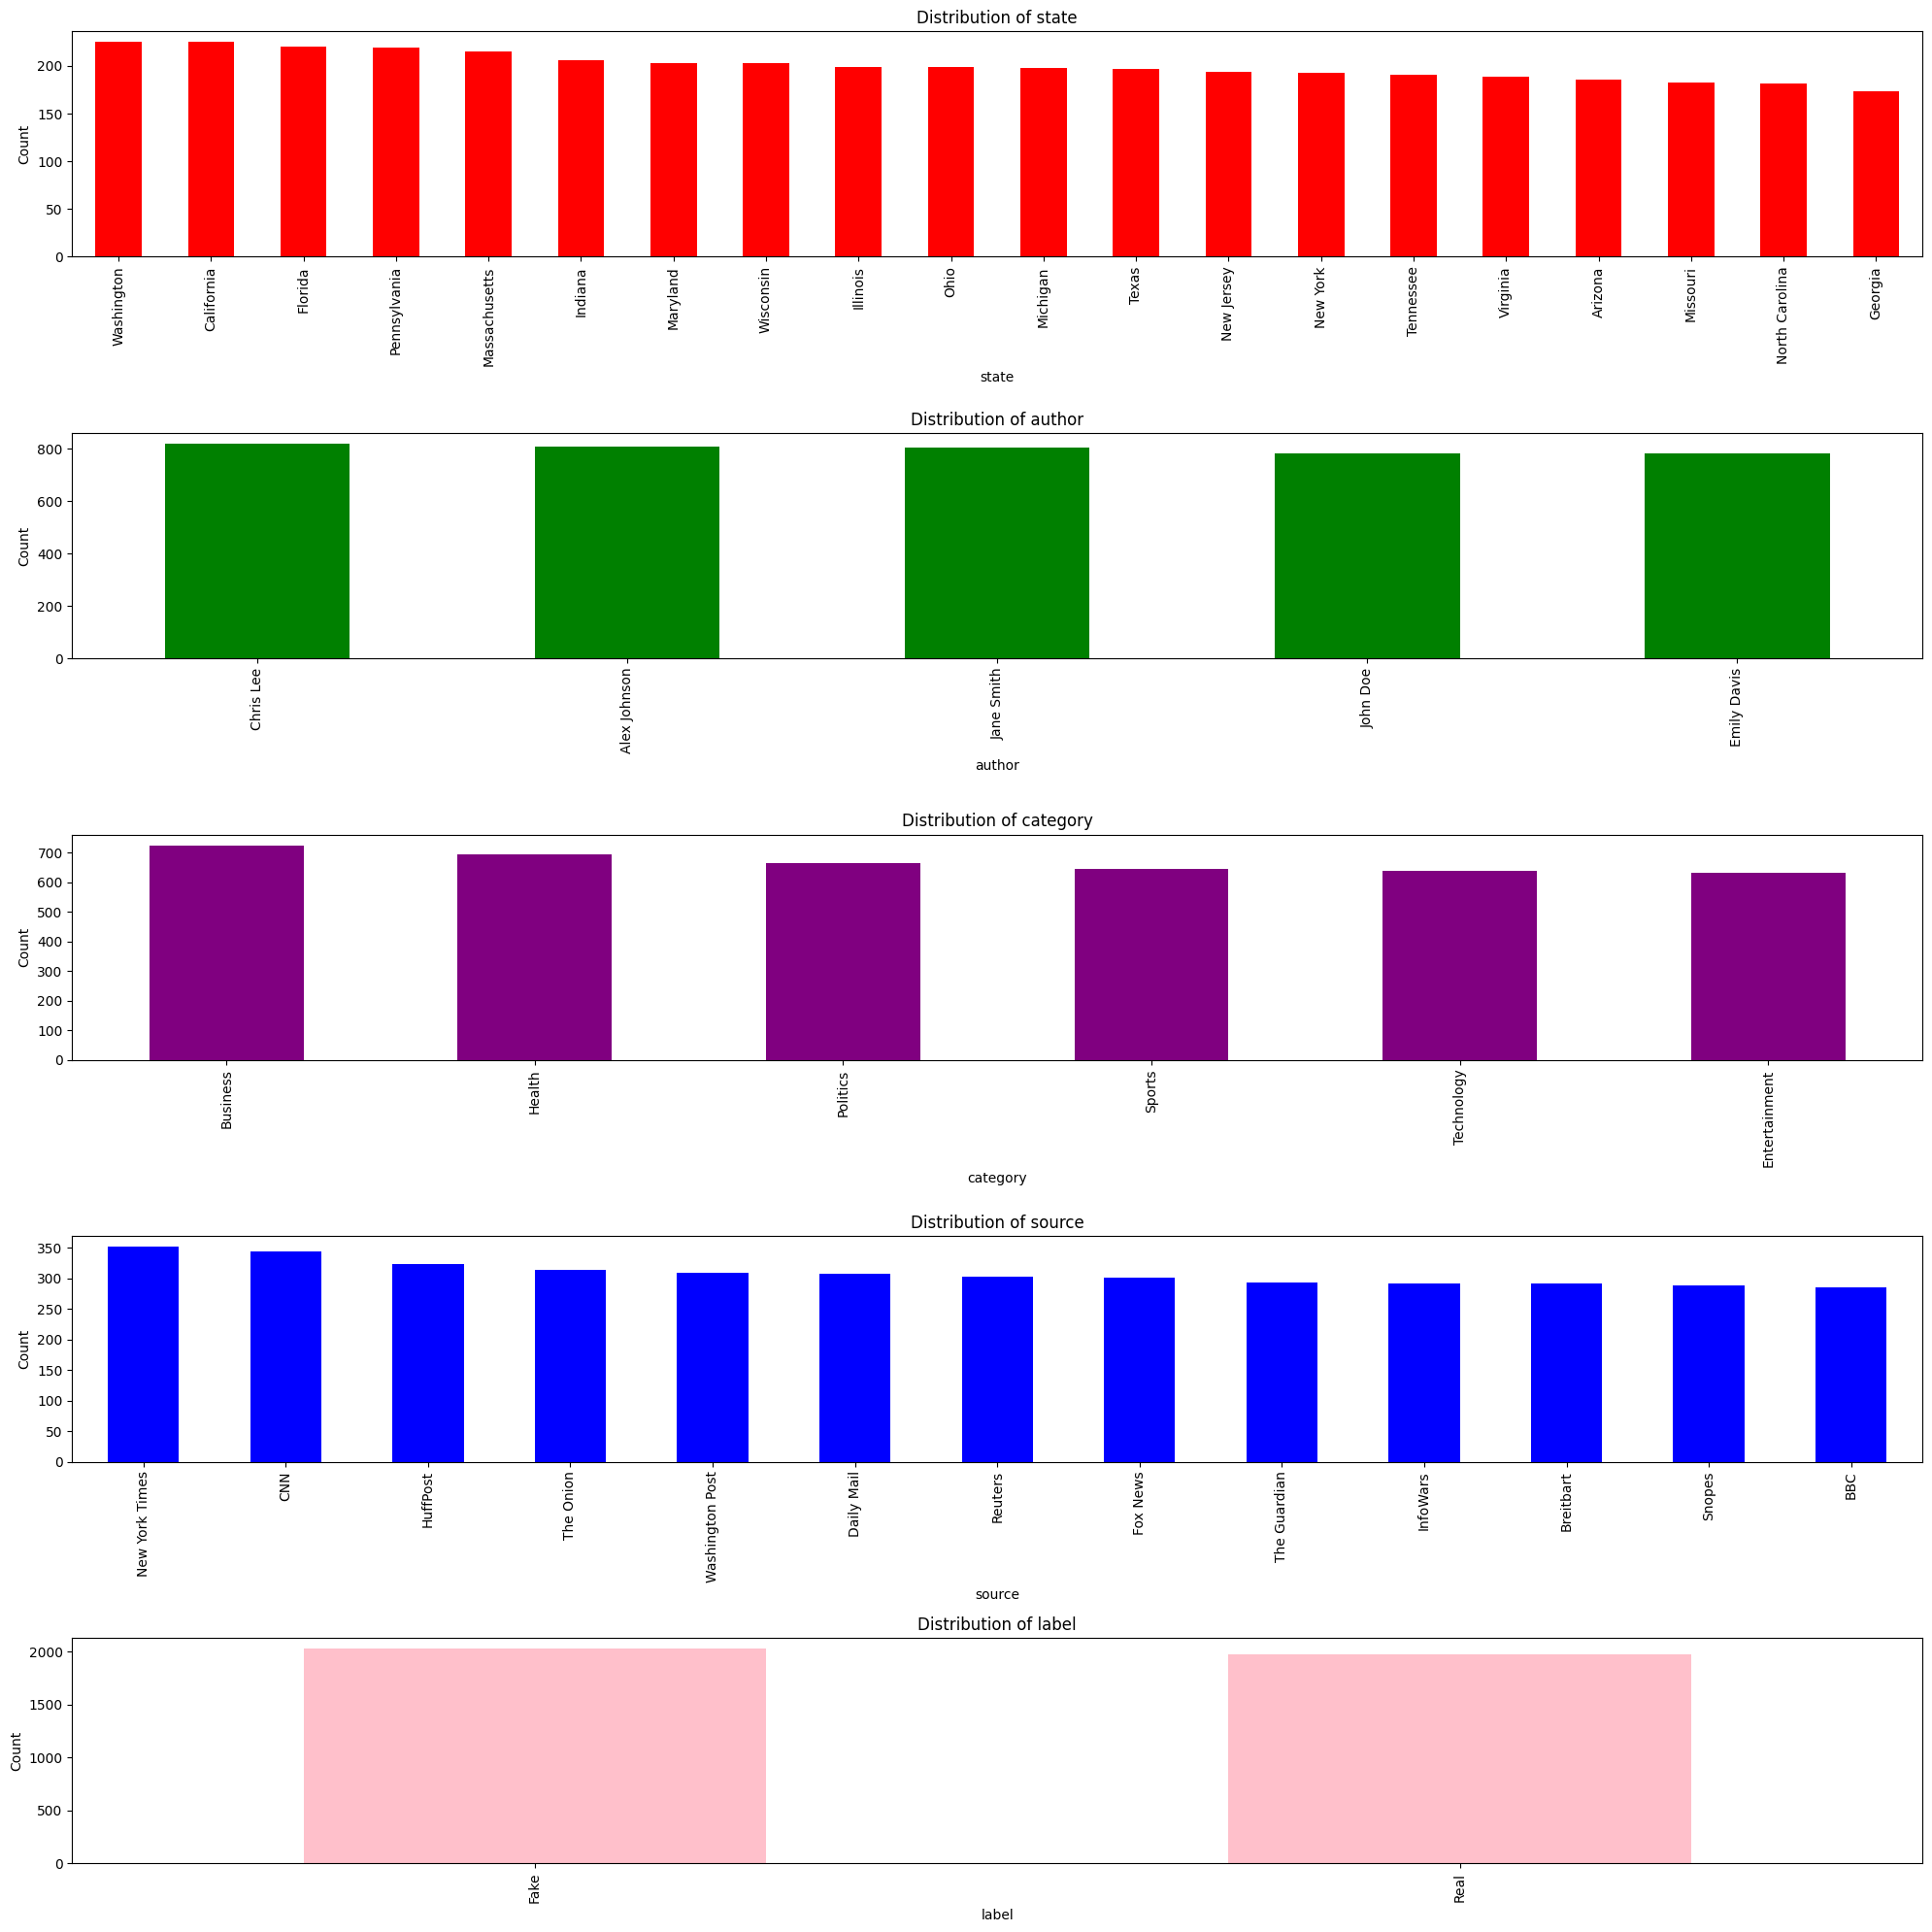

In [ ]:
fig,axes=plt.subplots(nrows=5,figsize=(20,20))

colors=['red','green','purple','blue','pink']

for col , axis,color in zip(categorical_columns,axes.flatten(),colors):
  df[col].value_counts().plot(kind='bar',ax=axis,color=color)
  axis.set_title(f"Distribution of {col}")
  axis.set_xlabel(col)
  axis.set_ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
#analyse numerical columns distribution
numerical_columns=['word_count','char_count','num_shares','num_comments','trust_score','source_reputation','clickbait_score','plagiarism_score']
numerical_columns

['word_count',
 'char_count',
 'num_shares',
 'num_comments',
 'trust_score',
 'source_reputation',
 'clickbait_score',
 'plagiarism_score']

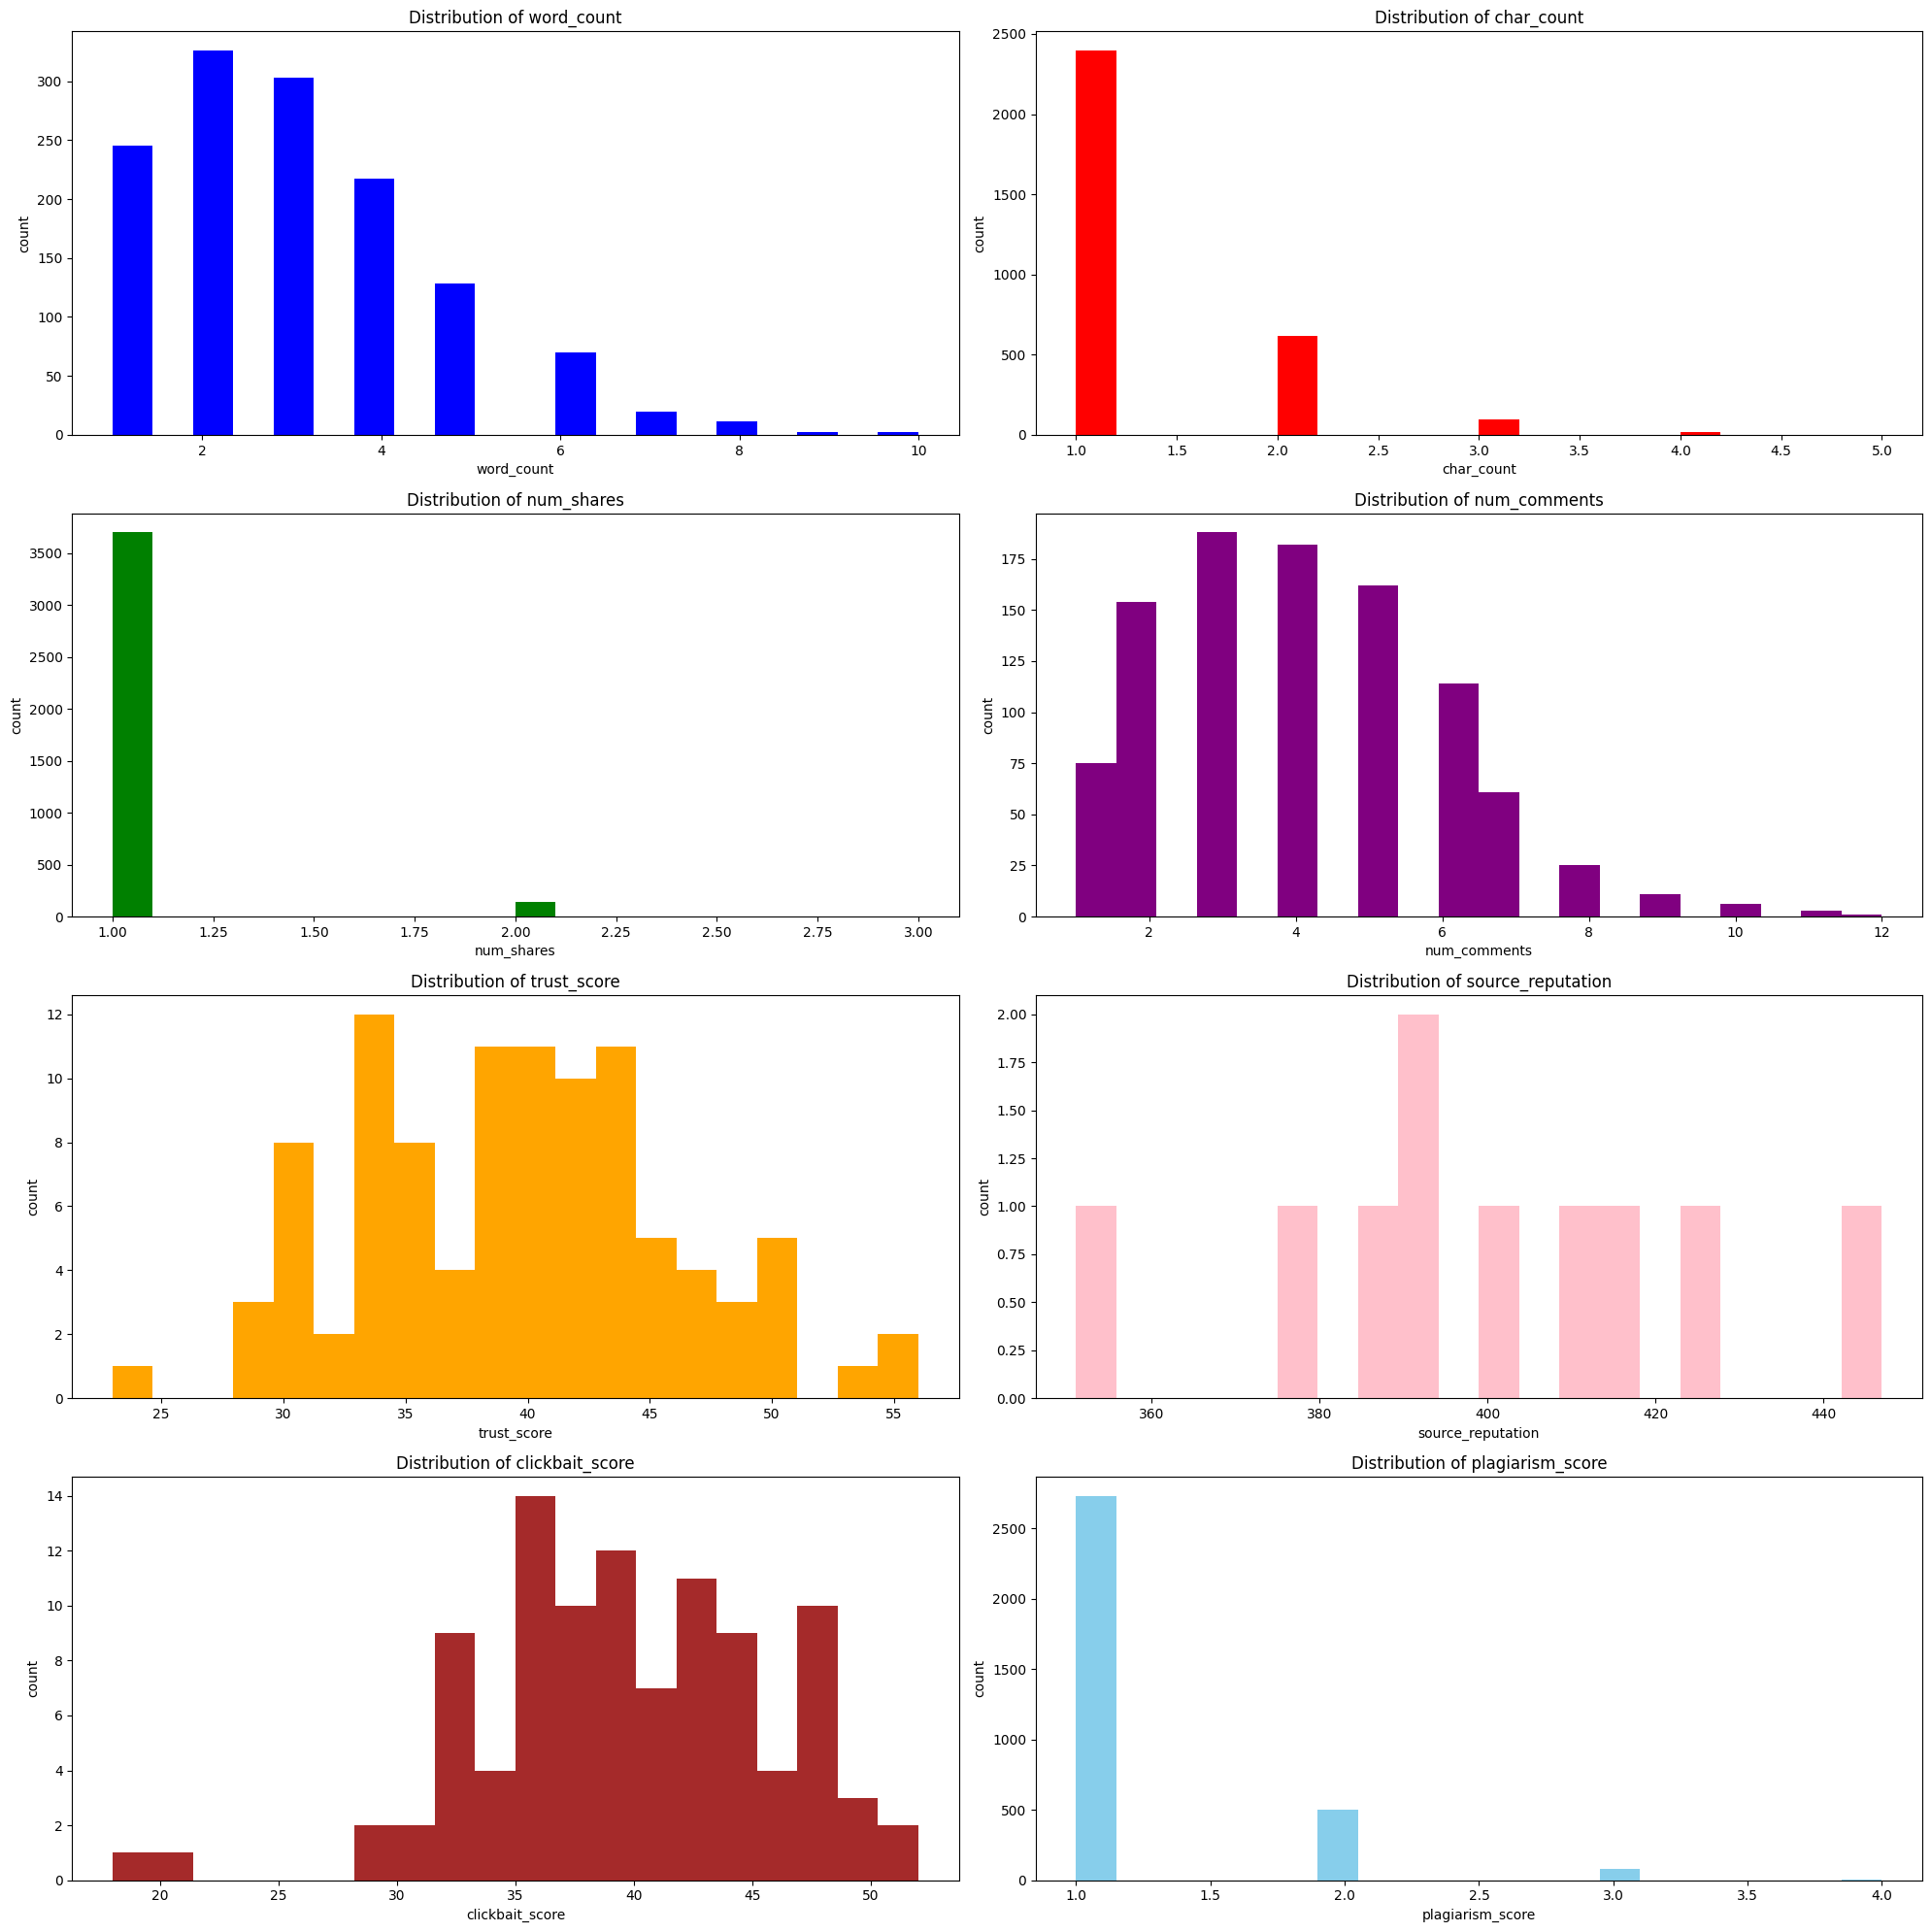

In [ ]:
fig,axes=plt.subplots(nrows=4,ncols=2,figsize=(20,20))
colors=['blue','red','green','purple','orange','pink','brown','skyblue']

for col,axis,color in zip(numerical_columns,axes.flatten(),colors):
  df[col].value_counts().plot(kind='hist',bins=20,ax=axis,color=color)
  axis.set_title(f"Distribution of {col}")
  axis.set_xlabel(col)
  axis.set_ylabel('count')
plt.tight_layout()
plt.show()


# **Observation:**

*   The above countplot and histogram shows some numerical and categorical columns distribution.
*   Both visuals are given overall view.

*   Now we take some columns both numerical and categorical and given Univariate,Bivariate,Multivariate visuals for better understanding.





# **Univariate**

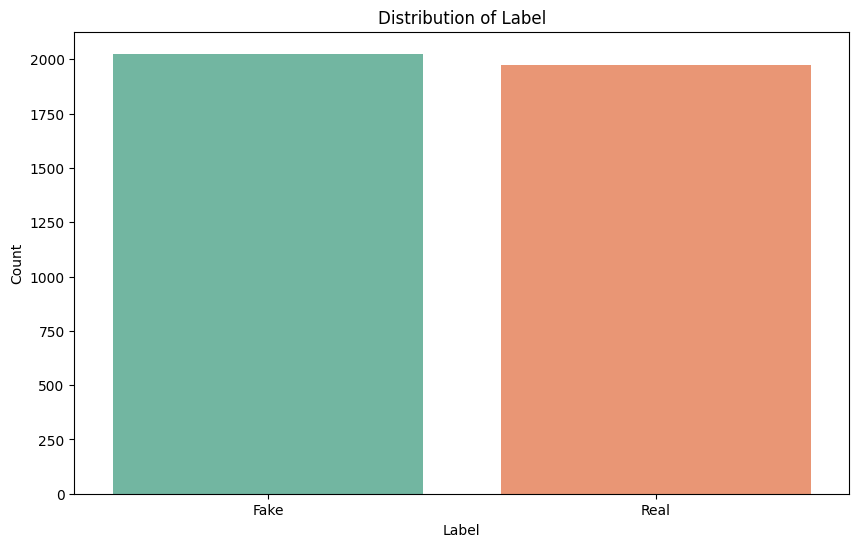

In [ ]:
# analyse the distribution of label column using countplot

plt.figure(figsize=(10,6))
sns.countplot(x='label',data=df,palette='Set2')
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**Explanation:**

This count plot shows clearly the fake news are morethan the  real news counts.

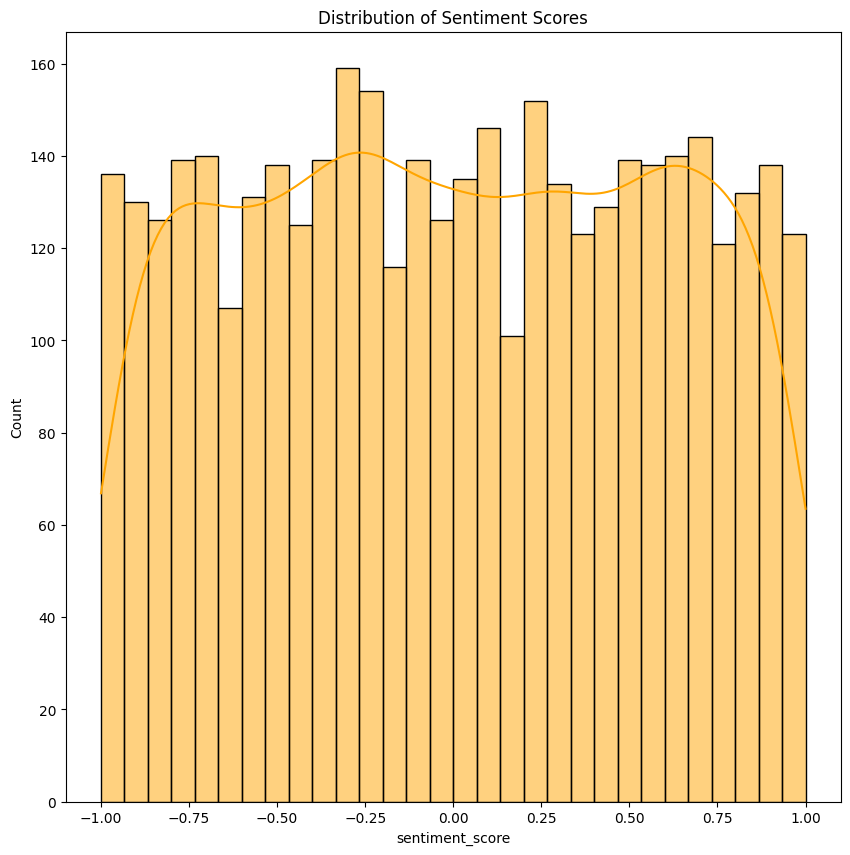

In [ ]:
#analyse the distribution of sentiment score

plt.figure(figsize=(10,10))
sns.histplot(df['sentiment_score'],kde=True,color='orange',bins=30)
plt.title("Distribution of Sentiment Scores")
plt.show()

**Explanation:**


*   Sentiment score hist plot shows -1 indicates negative sentiment,0 indicates neutral sentiment and 1 indicates positive sentiment
*   In overall this histplot given positive and negative sentiments in large values.



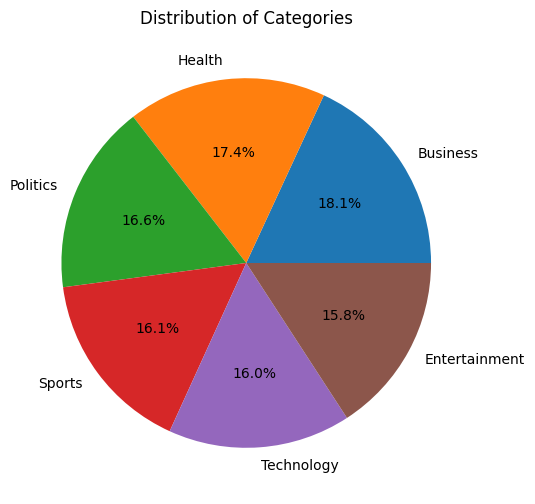

In [ ]:
# analyse the distribution of category using pie chart

#get the value counts and label

category_counts=df['category'].value_counts()
category_labels=category_counts.index

plt.figure(figsize=(10,6))
plt.pie(category_counts,labels=category_labels,autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.show()

**Explanation:**


*   The above pie chart shows category distribution of the dataset.
* The news has a high percentage of value in the dataset when compared to others 'Business'categories.

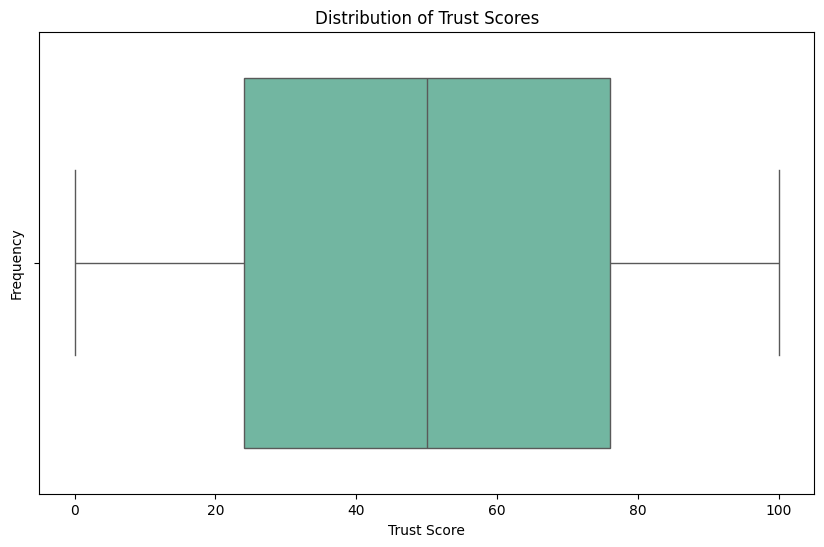

In [ ]:
# analyse the distribution of trust score using box plot

plt.figure(figsize=(10,6))
sns.boxplot(x='trust_score',data=df,palette='Set2')
plt.xlabel('Trust Score')
plt.ylabel('Frequency')
plt.title('Distribution of Trust Scores')
plt.show()

**Explanation:**
The above box plot shows trust score distribution of the dataset.There is no outliers in this column and the trust score will be median so it is typical score.

# **Bivariate**

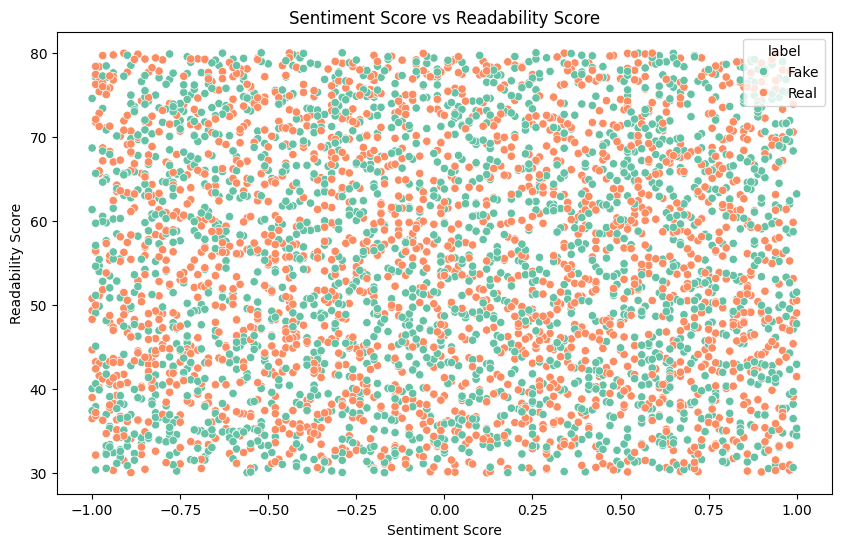

In [ ]:
# sentiment score vs readability score

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='sentiment_score',y='readability_score',hue='label',palette='Set2')
plt.xlabel('Sentiment Score')
plt.ylabel('Readability Score')
plt.title( 'Sentiment Score vs Readability Score')
plt.legend(title='label',loc='upper right')
plt.show()

**Explanation :**

*   The above scatter plots shows the relationship between sentiment score and readability score.
*   Both columns have negative and positive scores.It will be calculated by label column.



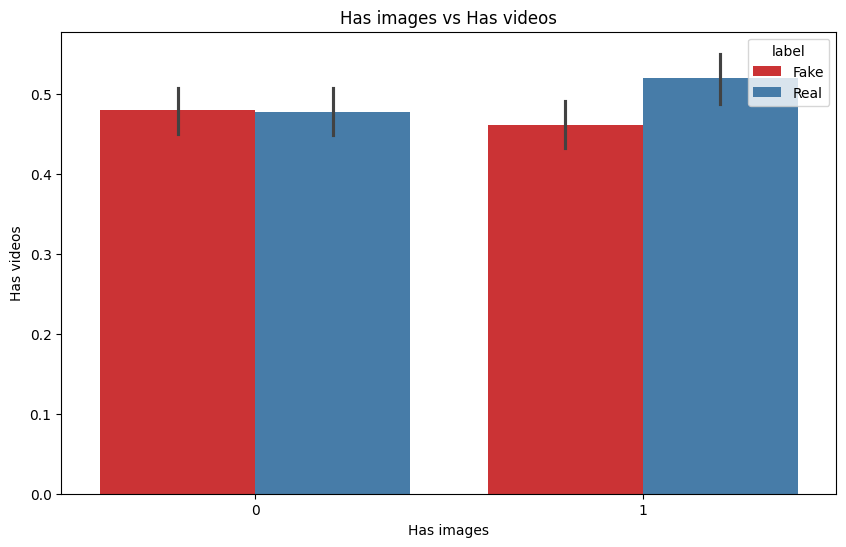

In [ ]:
# has_images vs has_videos
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='has_images',y='has_videos',hue='label',palette='Set1')
plt.xlabel('Has images')
plt.ylabel('Has videos')
plt.title('Has images vs Has videos')
plt.legend(title='label',loc='upper right')
plt.show()

**Explanation:**

*   The above bar plot shows the relationship between has images and has videos of the dataset.
*   Both images and videos in fake news have same counts.

*   Compare with fake, real images,videos count has high.
   





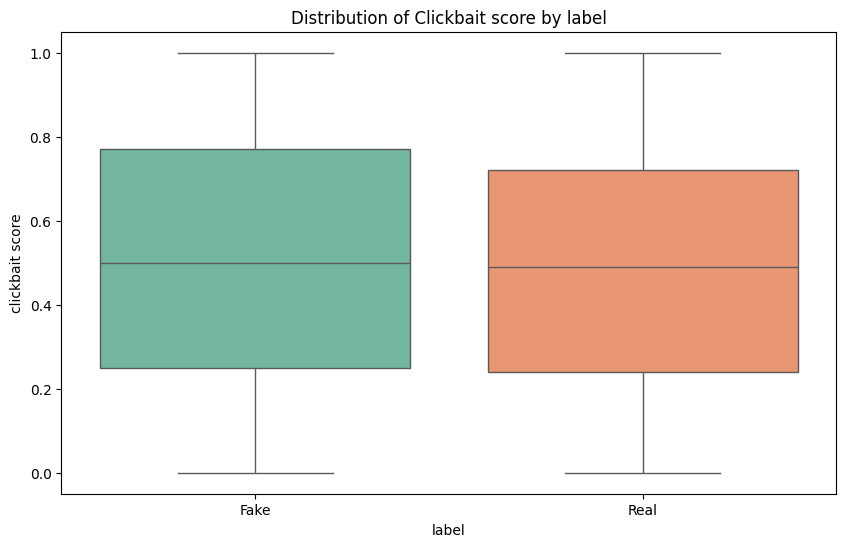

In [ ]:
# Distribution of Clickbait score by nemws label

plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='label',y='clickbait_score',palette='Set2')
plt.title('Distribution of Clickbait score by label')
plt.xlabel('label')
plt.ylabel('clickbait score')
plt.show()

**Explanation :**

*   **Clickbait Score** It is like a headline or title attract the people to read the news.
*   The above box plot shows the distribution of clickbait score by the news labels like fake and real.

*   Compare with real the fake news clickbait score was high.






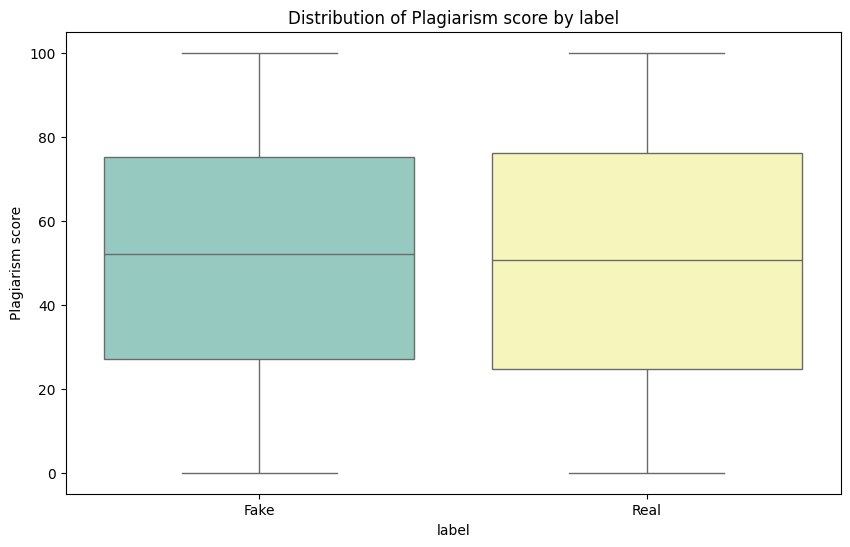

In [ ]:
# Distribution of Plagiarism score by news label
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='label',y='plagiarism_score',palette='Set3')
plt.title('Distribution of Plagiarism score by label')
plt.xlabel('label')
plt.ylabel('Plagiarism score')
plt.show()

**Explanation :**

*   **Plagiarism Score**It indicates how much of a given text matches the existing content from the other sources.
*   The above box plot shows the distribution of plagiarism score by news labels like fake and real.

*   Real news plagiarism is little bit low and high compare with fake news.





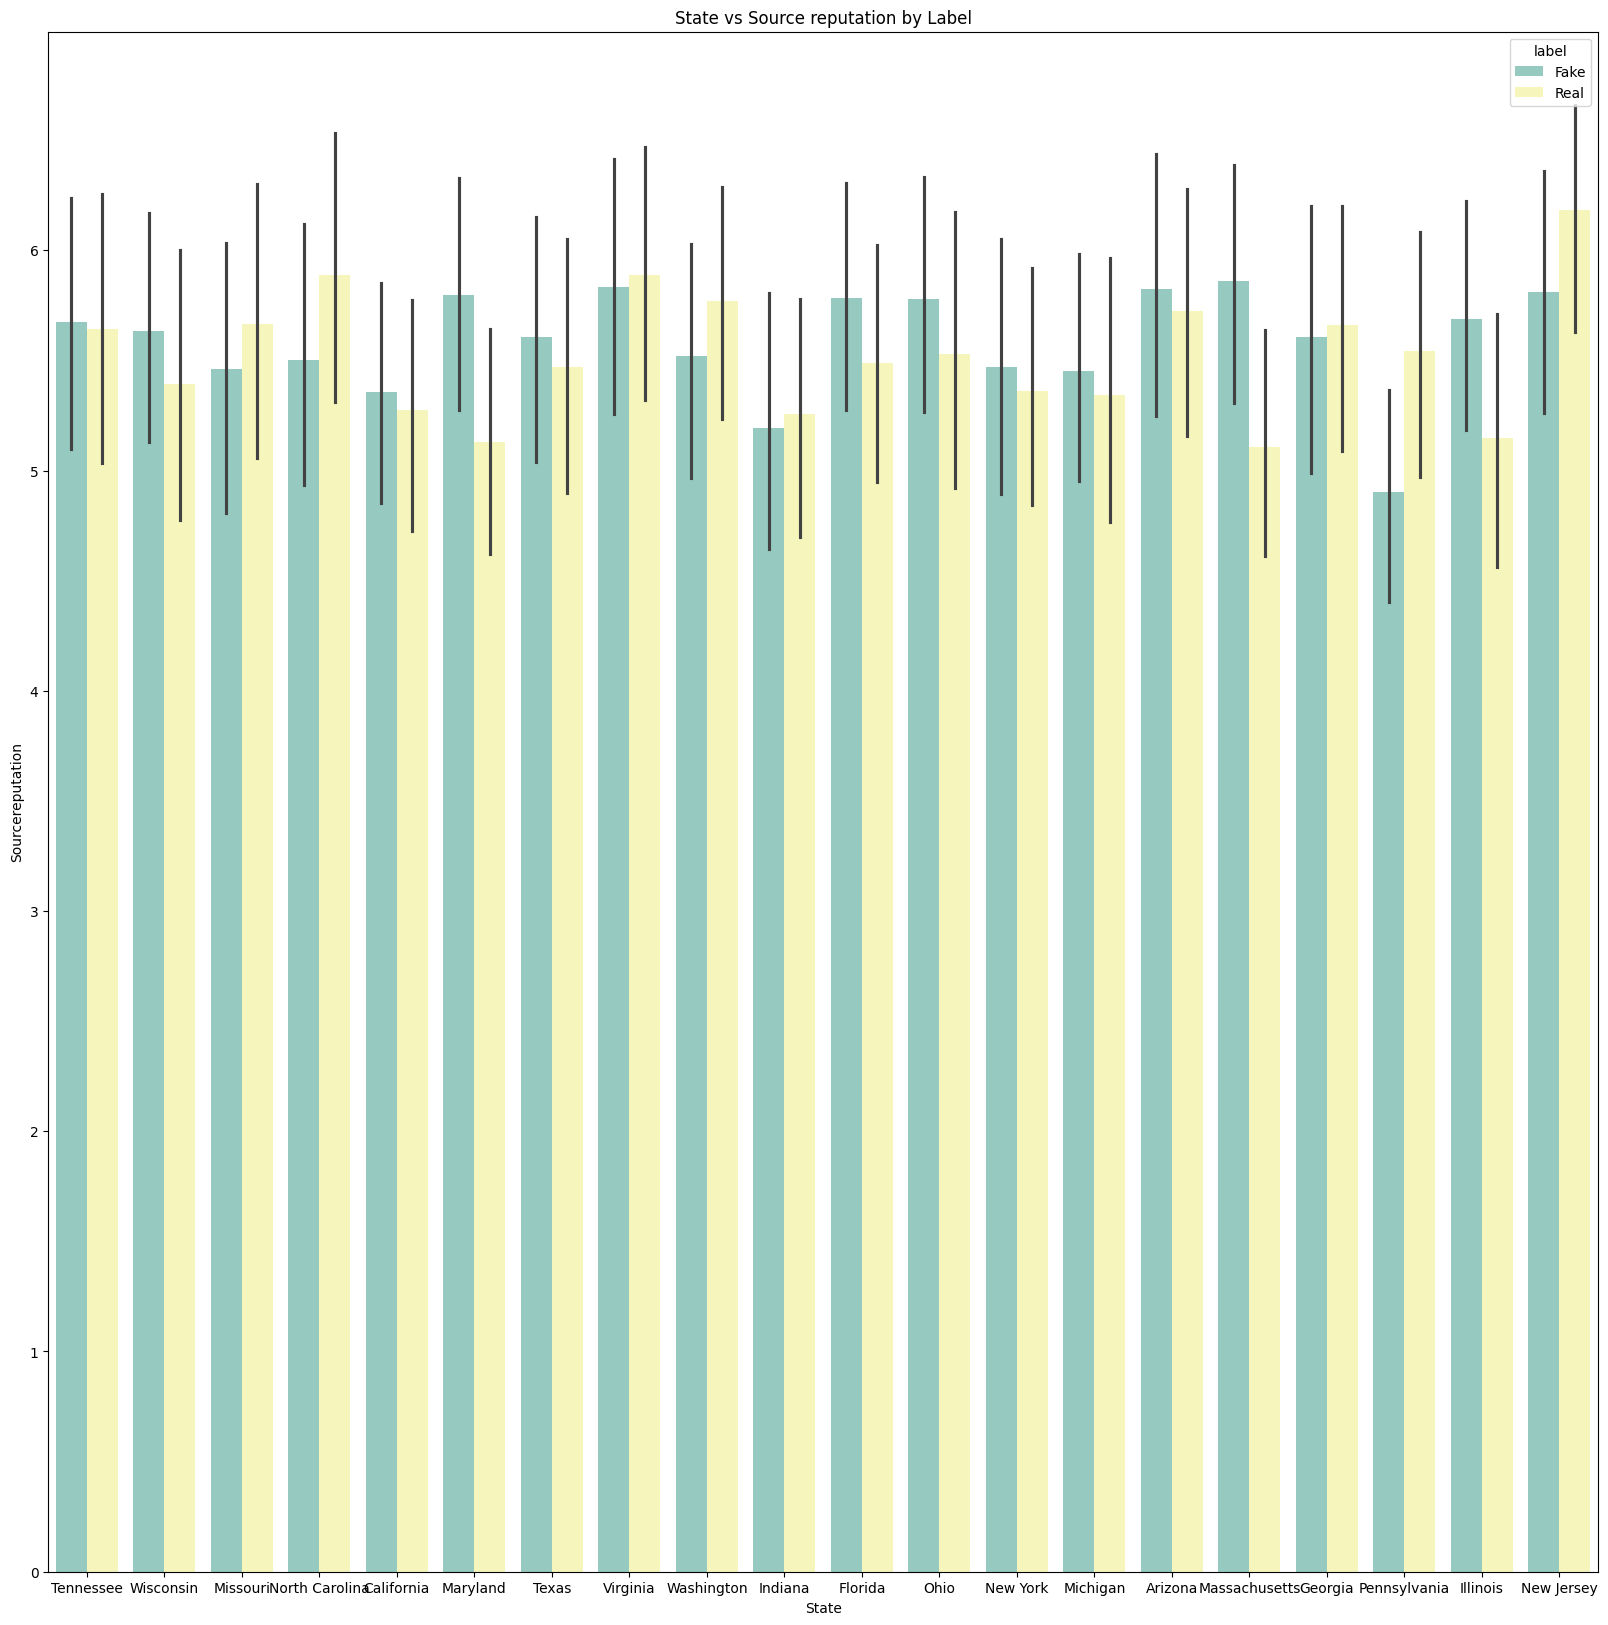

In [ ]:
# state vs source reputation by label

plt.figure(figsize=(20,20))
sns.barplot(data=df,x='state',y='source_reputation',hue='label',palette='Set3')
plt.xlabel('State')
plt.ylabel('Sourcereputation')
plt.title('State vs Source reputation by Label')
plt.legend(title='label',loc='upper right')
plt.show()

**Explanation :**

*   The above bar plot shows the state wise source reputation by news label.
*   Most of the stats has high source reputation in real news label.



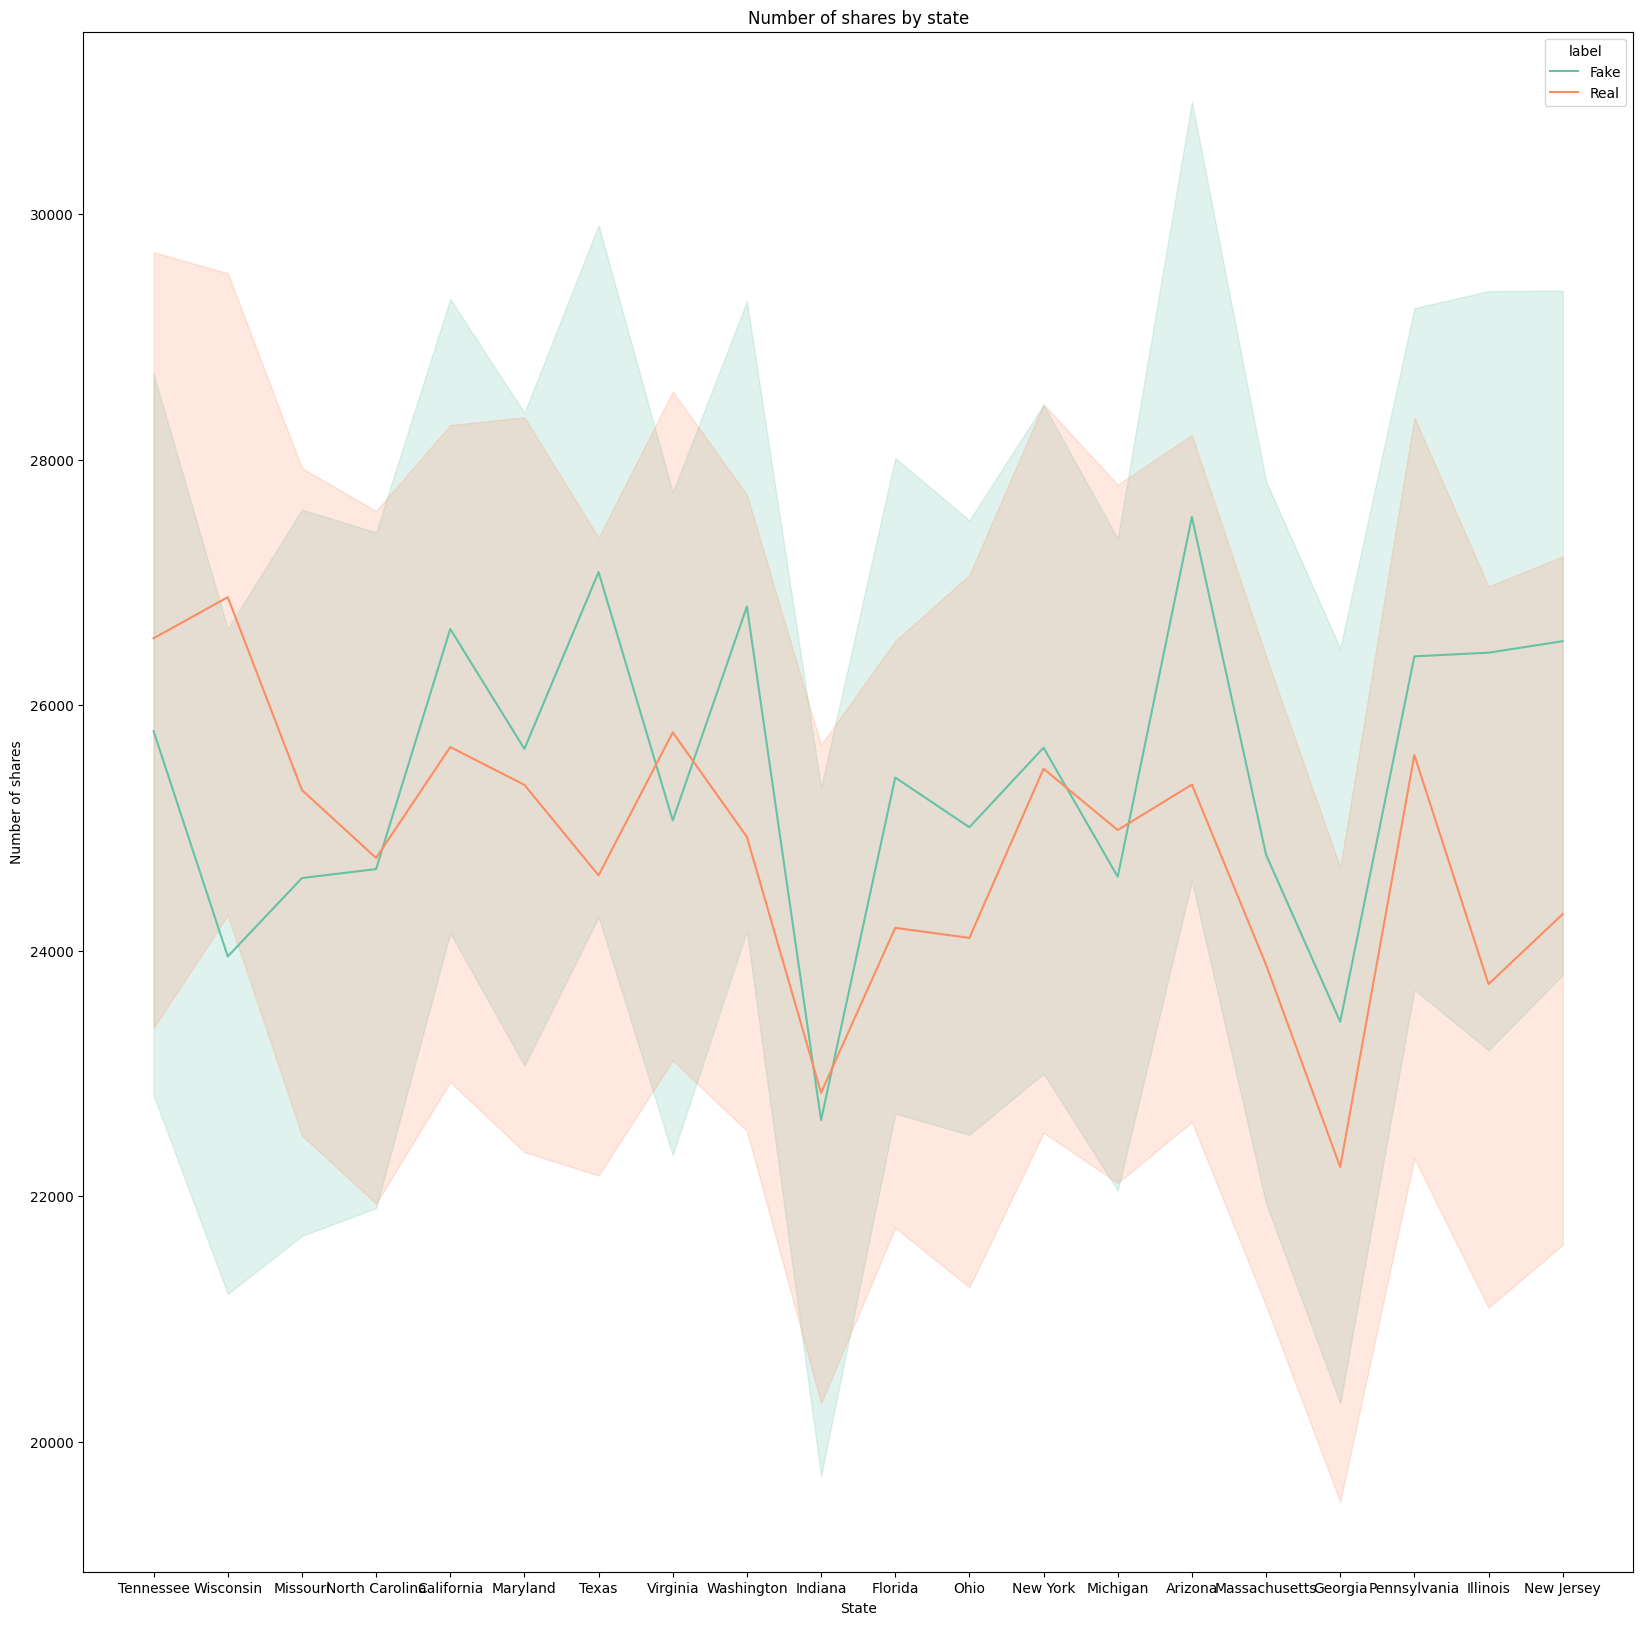

In [ ]:
# number of shares by state

plt.figure(figsize=(20,20))
sns.lineplot(data=df,x='state',y='num_shares',hue='label',palette='Set2')
plt.xlabel('State')
plt.ylabel('Number of shares')
plt.title('Number of shares by state')
plt.legend(title='label',loc='upper right')
plt.show()

**Explanation:**

*   The above line plot shows the number of fake or real news shared by the state.
*   Maximum state has to sharing fake news highly.



# **Multivariate**

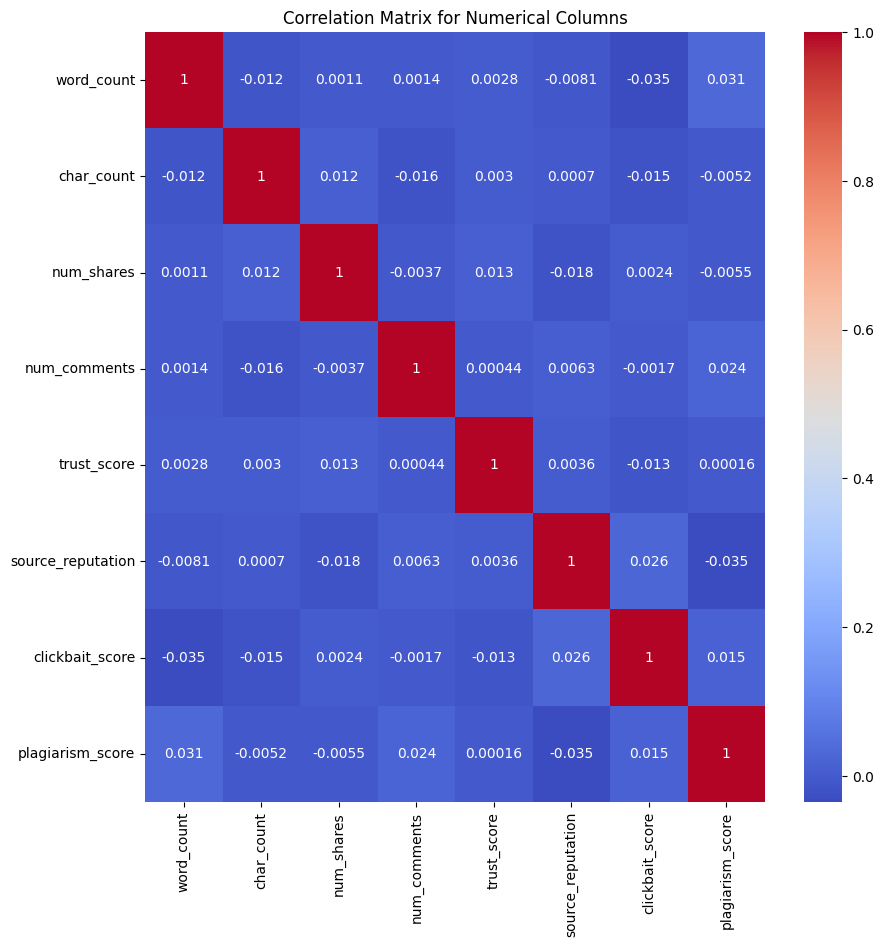

In [ ]:
# correlation matrix for numerical columns
numerical_columns=df[['word_count','char_count','num_shares','num_comments','trust_score','source_reputation','clickbait_score','plagiarism_score']]

plt.figure(figsize=(10,10))
sns.heatmap(numerical_columns.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

**Explanation :**

*   The above heat map shows the correlation matrix of the numerical columns.
*   There is equal positive and negative correlation between these columns.



<Figure size 2000x2000 with 0 Axes>

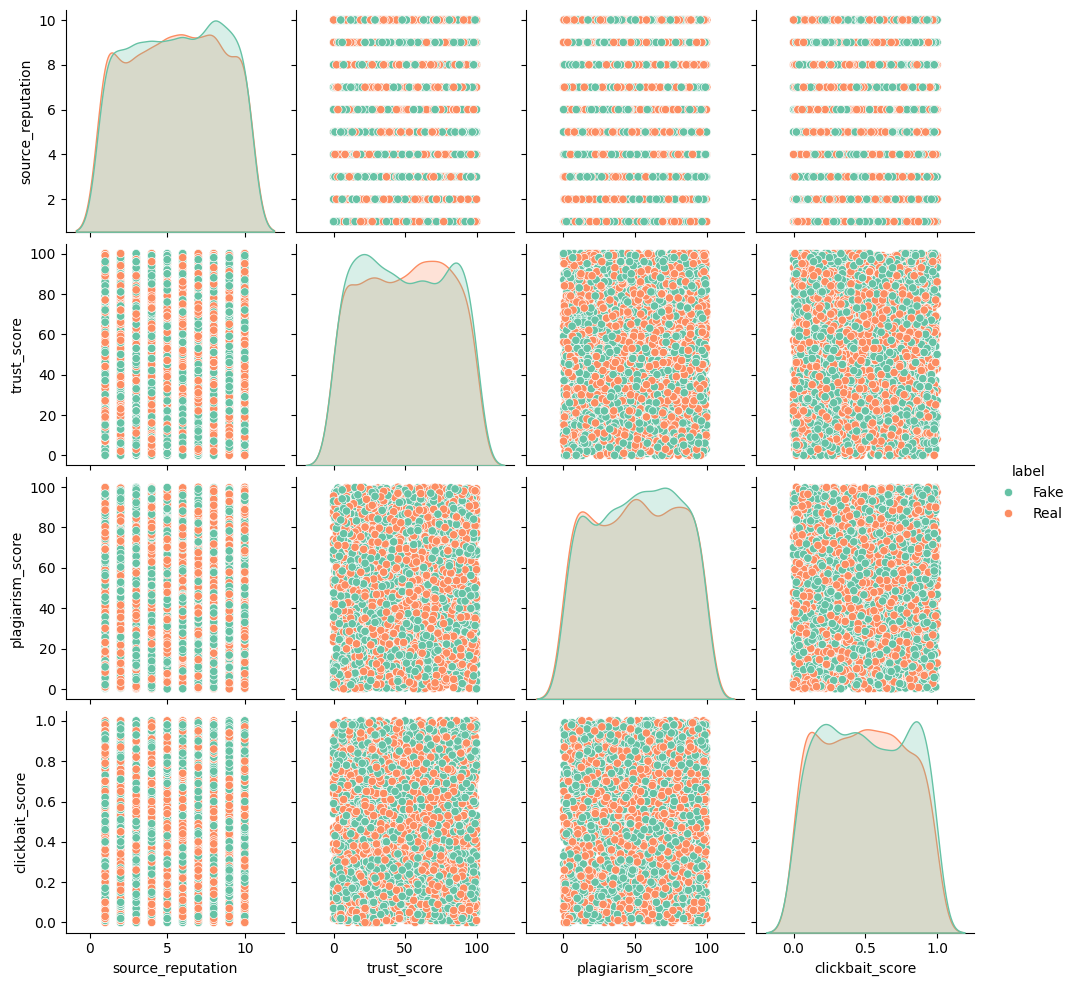

In [ ]:
# political bias vs reputation
selected_features=['source_reputation','trust_score','plagiarism_score','clickbait_score']

plt.figure(figsize=(20,20))
sns.pairplot(data=df,vars=selected_features,hue='label',palette='Set2')
plt.show()

**Expalnation:**

*   The above pair plots shows the relation between political bias with source reputation,trust score,clickbait score,plagiarism score by label.
*   But there is no big relationship between these columns.



**Observation:**

*   We get clear understanding about the dataset with use of above visualization.
*   These visuals are doing before preprocessing.

*   So further analysis we would do the preprocessing step.





# **Data Preprocessing**

In [ ]:
#finding null values
df.isnull().sum()

id                   0
title                0
author               0
text                 0
state                0
date_published       0
source               0
category             0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
political_bias       0
fact_check_rating    0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
label                0
dtype: int64

No missing values in this dataset.

In [ ]:
# finding outliers for numerical columns

numerical_columns=df.select_dtypes(include=['int64','float64']).columns
# find IQR for dataframe
Q1=df[numerical_columns].quantile(0.25)
Q3=df[numerical_columns].quantile(0.75)


IQR=Q3 - Q1

print(IQR)

id                    1999.500
sentiment_score          1.000
word_count             704.250
char_count            3847.750
has_images               1.000
has_videos               1.000
readability_score       24.735
num_shares           24671.750
num_comments           503.000
is_satirical             1.000
trust_score             52.000
source_reputation        5.000
clickbait_score          0.500
plagiarism_score        49.665
dtype: float64


In [ ]:
#find lower and upper bound

lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

id                   -1998.5000
sentiment_score         -1.9900
word_count            -610.6250
char_count           -3412.8750
has_images              -1.5000
has_videos              -1.5000
readability_score        5.3775
num_shares          -24225.8750
num_comments          -516.5000
is_satirical            -1.5000
trust_score            -54.0000
source_reputation       -4.5000
clickbait_score         -0.5100
plagiarism_score       -48.5825
dtype: float64
id                    5999.5000
sentiment_score          2.0100
word_count            2206.3750
char_count           11978.1250
has_images               2.5000
has_videos               2.5000
readability_score      104.3175
num_shares           74461.1250
num_comments          1495.5000
is_satirical             2.5000
trust_score            154.0000
source_reputation       15.5000
clickbait_score          1.4900
plagiarism_score       150.0775
dtype: float64


In [ ]:
# find outliers

outliers=(df[numerical_columns]<lower_bound) | (df[numerical_columns]>upper_bound)
print(outliers.sum())

id                   0
sentiment_score      0
word_count           0
char_count           0
has_images           0
has_videos           0
readability_score    0
num_shares           0
num_comments         0
is_satirical         0
trust_score          0
source_reputation    0
clickbait_score      0
plagiarism_score     0
dtype: int64


There is no outliers in this dataset.

In [ ]:
# finding skewness
df[numerical_columns].skew()

id                   0.000000
sentiment_score     -0.004312
word_count           0.005438
char_count          -0.019357
has_images           0.014006
has_videos           0.062053
readability_score    0.046219
num_shares          -0.015971
num_comments         0.051459
is_satirical         0.012005
trust_score          0.001528
source_reputation   -0.041402
clickbait_score      0.024137
plagiarism_score    -0.046224
dtype: float64

Based on above skewness score no columns have high skew it means more than 1.Maximun columns have negative skew(<0) and other columns have positive skew(>0).So no need to take log and square root transformation.

# **Feature Engineering**

In [ ]:
#take copy of df before encoding

df_encoded=df.copy()

In [ ]:
#convert categorical columns into numerical column using label  encoding

from sklearn.preprocessing import LabelEncoder

label_encoded=LabelEncoder()

for col in df_encoded.select_dtypes(include=['object']):
  df_encoded[col]=label_encoded.fit_transform(df_encoded[col])

In [ ]:
df_encoded.head()

id  title  author  text  state  date_published  source  category  \
0   1      0       3     0     15            1384      11         1   
1   2   1111       2  1111     19              82      10         5   
2   3   2222       4  2222      9             577       7         4   
3   4   3333       0  3333     12             339       2         4   
4   5   3445       2  3445      1            1036       3         5   

   sentiment_score  word_count  ...  num_shares  num_comments  political_bias  \
0            -0.22        1302  ...       47305           450               0   
1             0.92         322  ...       39804           530               1   
2             0.25         228  ...       45860           763               0   
3             0.94         155  ...       34222           945               0   
4            -0.01         962  ...       35934           433               2   

   fact_check_rating  is_satirical  trust_score  source_reputation  \
0                  0             1           76                  6   
1                  1             1            1                  5   
2                  1             0           57                  1   
3                  2             1           18                 10   
4                  1             0           95                  6   

   clickbait_score  plagiarism_score  label  
0             0.84             53.35      0  
1             0.85             28.28      0  
2             0.72              0.38      0  
3             0.92             32.20      0  
4             0.66             77.70      1  

[5 rows x 24 columns]

In [ ]:
df=df_encoded

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4000 non-null   int64  
 1   title              4000 non-null   int64  
 2   author             4000 non-null   int64  
 3   text               4000 non-null   int64  
 4   state              4000 non-null   int64  
 5   date_published     4000 non-null   int64  
 6   source             4000 non-null   int64  
 7   category           4000 non-null   int64  
 8   sentiment_score    4000 non-null   float64
 9   word_count         4000 non-null   int64  
 10  char_count         4000 non-null   int64  
 11  has_images         4000 non-null   int64  
 12  has_videos         4000 non-null   int64  
 13  readability_score  4000 non-null   float64
 14  num_shares         4000 non-null   int64  
 15  num_comments       4000 non-null   int64  
 16  political_bias     4000 

# **Feature Selection**

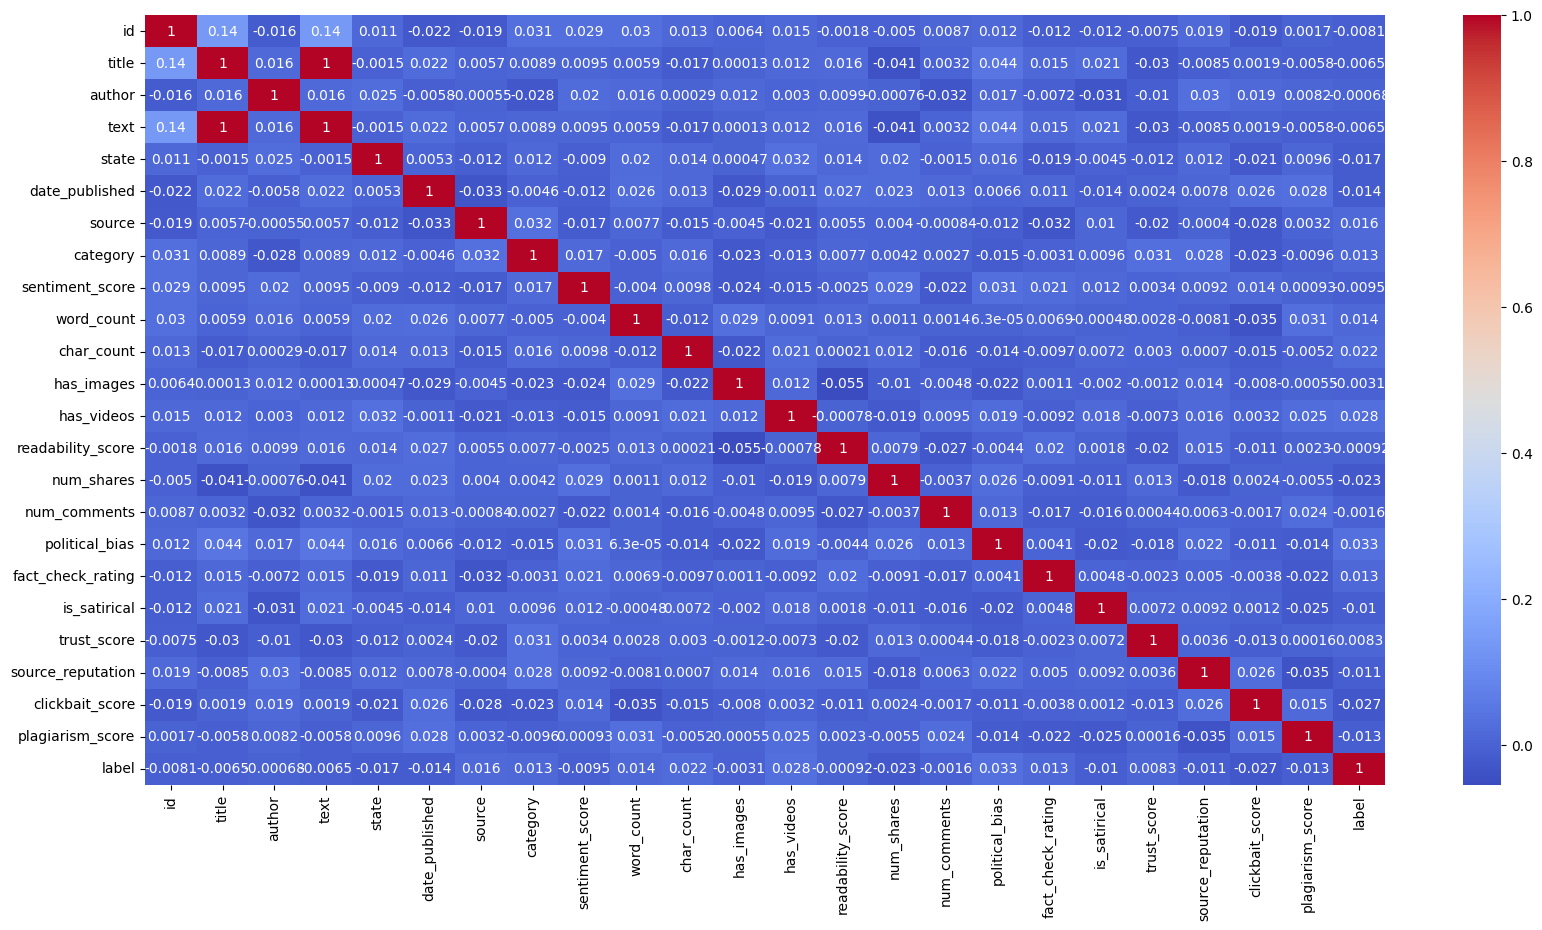

In [ ]:
#select features using correlation matrix heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Observation:**

*   On Basis of the fake news dataset we take label column to target.
*   Using the correlation heatmap we have to decide some columns are not suitable for feature selection.

*   Id column no need preditive value.
*   title,author,text,date_published,state,source these columns are not give meaningful relationship.

*   except these columns other columns we take for feature selection.







In [ ]:
#selecting features and target
x=df.drop(['id','label'],axis=1)
y=df['label']

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 24)
(3200, 22)
(800, 22)
(3200,)
(800,)


In [ ]:
y_train.value_counts()

label
0    1615
1    1585
Name: count, dtype: int64

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)

(3200, 22)
(800, 22)


# **Multiple models building**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix

In [ ]:
Models={'Logistic Regression ':LogisticRegression(),
        'Decision Tree':DecisionTreeClassifier(),
        'Knn':KNeighborsClassifier(),
        'RandomForest':RandomForestClassifier(),
        'SVM':SVC(),
        'XGBoost':XGBClassifier(),
        'GaussianNB':GaussianNB()}

# **Model Evaluation**

In [ ]:
Results=[]
for name,model in Models.items():
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  acc=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred,average='weighted')
  Results.append([name,acc,f1])

Results_df=pd.DataFrame(Results,columns=['Model','Accuracy','F1 Score'])
print(Results_df)

                  Model  Accuracy  F1 Score
0  Logistic Regression    0.50875  0.506242
1         Decision Tree   0.48000  0.478982
2                   Knn   0.52125  0.521329
3          RandomForest   0.51875  0.518814
4                   SVM   0.52000  0.519543
5               XGBoost   0.50375  0.503816
6            GaussianNB   0.50375  0.502195


Results of accuracy score and f1 score not low but it want to be improving so we use Random Forest Feature impotance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

importance=rf.feature_importances_
features=x_train.columns

importance_df=pd.DataFrame({'Feature':features,'Importance':importance})
importance_df=importance_df.sort_values(by='Importance',ascending=False)

top_features=importance_df
print("Top Features:",top_features)


Top Features:               Feature  Importance
9          char_count    0.067972
13         num_shares    0.067251
21   plagiarism_score    0.065562
8          word_count    0.065457
12  readability_score    0.064861
4      date_published    0.064853
14       num_comments    0.064197
0               title    0.061278
20    clickbait_score    0.061231
18        trust_score    0.059815
2                text    0.059616
7     sentiment_score    0.058888
3               state    0.046607
5              source    0.041167
19  source_reputation    0.036951
6            category    0.028466
1              author    0.024802
15     political_bias    0.016553
16  fact_check_rating    0.016439
17       is_satirical    0.009623
10         has_images    0.009389
11         has_videos    0.009024


In [ ]:
#selected features
select_features=['char_count','num_shares','plagiarism_score','word_count','readability_score',
                 'num_comments','clickbait_score','trust_score','title','text','state','source',
                 'sentiment_score']

In [ ]:
#define features and target
X=df[select_features]
y=df['label']

#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#feature scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
#models building

models={
    'Logistic Regression':LogisticRegression(max_iter=1000),
    'Random Forest':RandomForestClassifier(n_estimators=100,random_state=42),
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42),
    'SVM':SVC(),
    'KNN':KNeighborsClassifier()
}

In [ ]:
results=[]
for name,model in Models.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  acc=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred,average='weighted')
  results.append([name,acc,f1])

results_df=pd.DataFrame(results,columns=['Model','Accuracy','F1 Score'])
print(results_df)

                  Model  Accuracy  F1 Score
0  Logistic Regression    0.50375  0.502599
1         Decision Tree   0.48500  0.484961
2                   Knn   0.49500  0.494747
3          RandomForest   0.48625  0.486318
4                   SVM   0.51000  0.509816
5               XGBoost   0.52000  0.520072
6            GaussianNB   0.48125  0.480516


Slightly improvement in accuracy score and f1 score after feature importance although we use hyperparameter tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid= {
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,20]
}

grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='f1_macro')
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [ ]:
from sklearn.model_selection import cross_val_score

best_model=grid_search.best_estimator_
scores=cross_val_score(best_model,X_train_scaled,y_train,cv=5,scoring='f1_macro')


print('CrossValidation F1 Score :',scores.mean())


CrossValidation F1 Score : 0.5126442140300435


In [ ]:
#models building

models={
    'Logistic Regression':LogisticRegression(max_iter=1000),
    'Random Forest':RandomForestClassifier(n_estimators=100,random_state=42),
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42),
    'SVM':SVC(),
    'KNN':KNeighborsClassifier()
}

results={}
for name,model in Models.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  acc=accuracy_score(y_test,y_pred)
  f1=f1_score(y_test,y_pred,average='weighted')
  results[name]={'Accuracy Score':acc,'F1 Score':f1}

results_df=pd.DataFrame(results).T
print(results_df)


                      Accuracy Score  F1 Score
Logistic Regression          0.50375  0.502599
Decision Tree                0.46625  0.466348
Knn                          0.49500  0.494747
RandomForest                 0.52000  0.519760
SVM                          0.51000  0.509816
XGBoost                      0.52000  0.520072
GaussianNB                   0.48125  0.480516


Again slightly difference in both scores so finally we compare accuracy score and f1 score with visualization

# **Model Evaluation and Comparisons**

# **Accuracy Scores Comparison**

In [ ]:
models={
    'Logistic Regression':LogisticRegression(max_iter=1000),
    'Random Forest(Tuned)':RandomForestClassifier(n_estimators=100,random_state=42),
    'Random Forest (untuned)':grid_search.best_estimator_,
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42),
    'SVM':SVC(),
    'KNN':KNeighborsClassifier(),
    'GaussianNB':GaussianNB()
}


accuracy_results={}

for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  acc=accuracy_score(y_test,y_pred)
  accuracy_results[name]=acc

  print(f'{name} Accuracy: {acc:.4f}')

Logistic Regression Accuracy: 0.5038
Random Forest(Tuned) Accuracy: 0.5212
Random Forest (untuned) Accuracy: 0.4850
XGBoost Accuracy: 0.5200
SVM Accuracy: 0.5100
KNN Accuracy: 0.4950
GaussianNB Accuracy: 0.4813


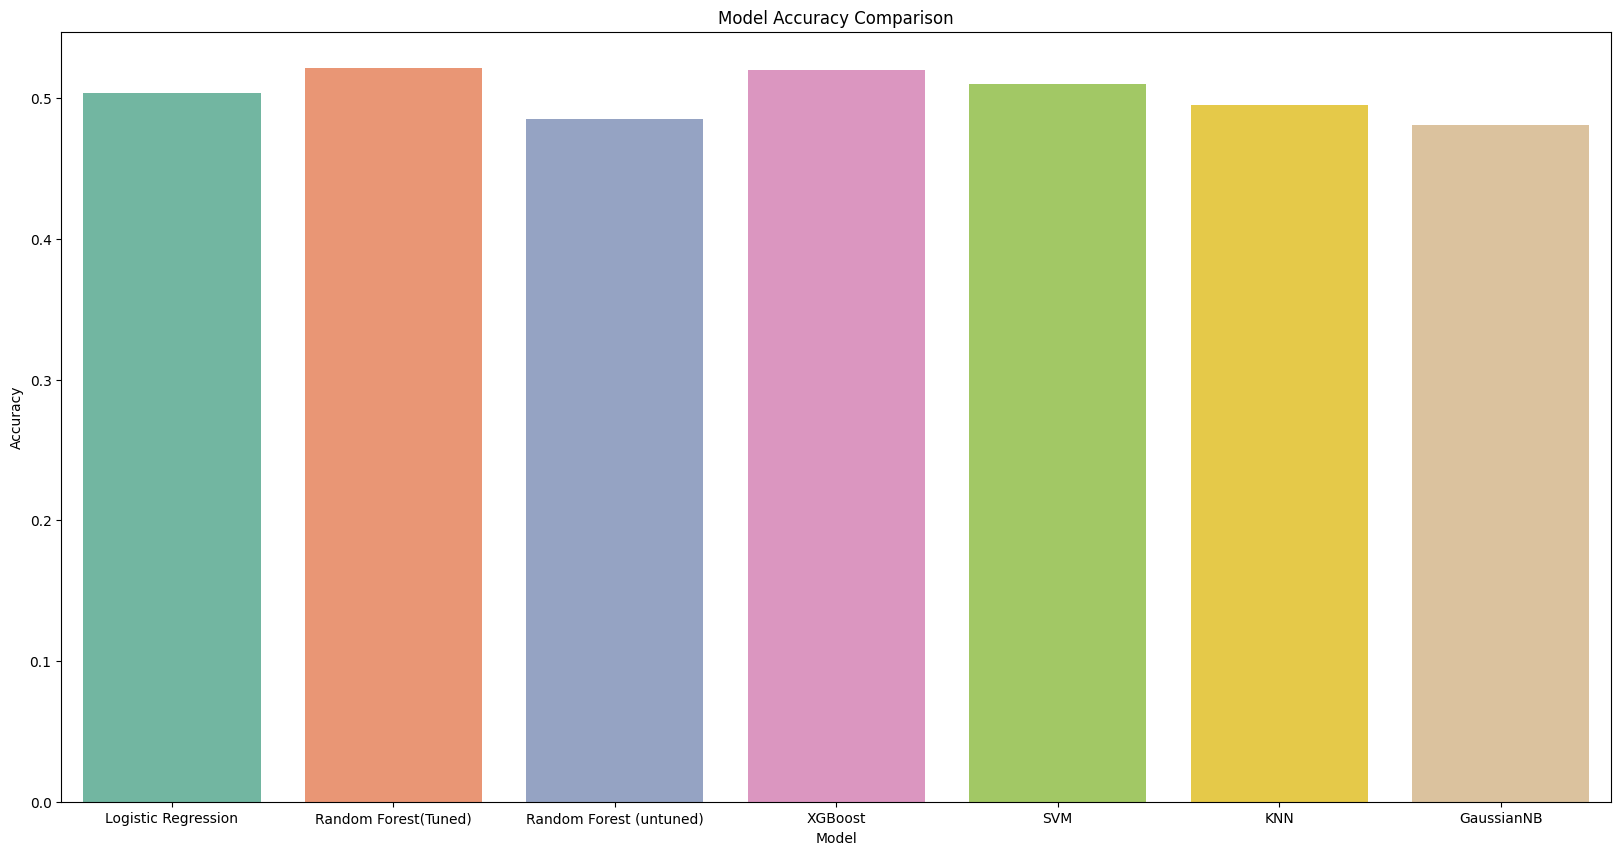

In [ ]:
#visual of accuracy score

plt.figure(figsize=(20,10))
sns.barplot(x=list(accuracy_results.keys()),y=list(accuracy_results.values()),palette='Set2')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# **F1 Scores Comparison**

In [ ]:
models={
    'Logistic Regression':LogisticRegression(max_iter=1000),
    'Random Forest(Tuned)':RandomForestClassifier(n_estimators=100,random_state=42),
    'Random Forest (untuned)':grid_search.best_estimator_,
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42),
    'SVM':SVC(),
    'KNN':KNeighborsClassifier(),
    'GaussianNB':GaussianNB()
}


f1score_results={}

for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred=model.predict(X_test_scaled)
  f1=f1_score(y_test,y_pred)
  f1score_results[name]=f1

  print(f'{name} F1 Score: {f1:.4f}')

Logistic Regression F1 Score: 0.4700
Random Forest(Tuned) F1 Score: 0.4980
Random Forest (untuned) F1 Score: 0.4930
XGBoost F1 Score: 0.5164
SVM F1 Score: 0.5149
KNN F1 Score: 0.5012
GaussianNB F1 Score: 0.4518


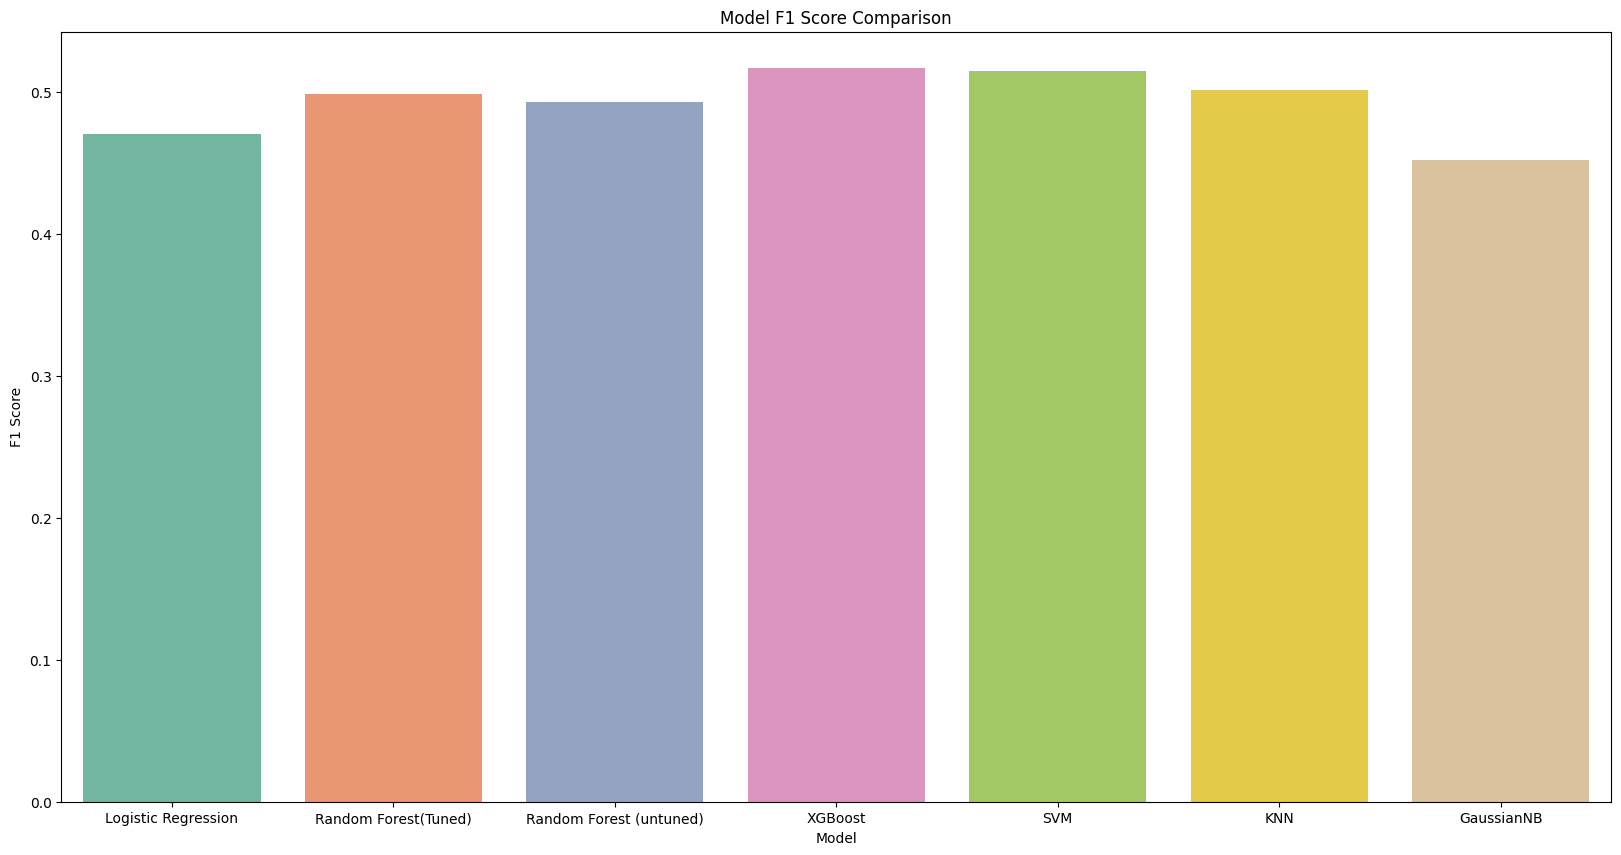

In [ ]:
#visual of f1 score

plt.figure(figsize=(20,10))
sns.barplot(x=list(f1score_results.keys()),y=list(f1score_results.values()),palette='Set2')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.show()

# **Conclusion**

The conclusion based on tuning models and their evaluation

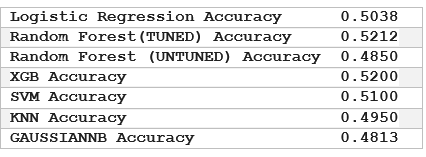

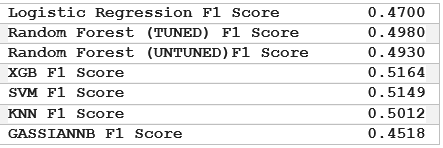

**Random Forest (tuned)** accuracy score (52%) and f1 score(50%) is higher after tuning.

**XGBoost** accuracy and f1 score are same after tuning(52%)

**Logistic Regression** accuracy score is (50%) is higher than their f1 score(47%).

**GaussianNB** has lowest accuracy(48%)and f1 score(45%)compare with other models.

Considering both metrics,XGBoost consistently demonstrates strong performance in terms of accuracy and f1 score.

SVM also exhibits robust performance ,especially in its F1 score.

Therefore for this fake news detection ,XGBoost and SVM appear to be the most suitable choices,offering a good balance between accuracy and a balanced handling of false positives and false negatives.